🚀 Simple Feature Relevance Analysis...
📊 Loaded data: (1458, 29)
📋 Available columns: ['Date', 'MealPeriod', 'RevenueCenterName', 'DayOfWeek', 'Month', 'Year', 'CheckTotal', 'is_zero', 'IslamicPeriod', 'IsRamadan', 'IsEid', 'IsPreRamadan', 'IsPostRamadan', 'IsLast10Ramadan', 'IsDSF', 'IsSummerEvent', 'IsWorldCup', 'IsNationalDay', 'IsNewYear', 'IsMarathon', 'IsGITEX', 'IsFilmFestival', 'IsAirshow', 'IsArtDubai', 'IsFoodFestival', 'IsPreEvent', 'IsPostEvent', 'TourismIntensity', 'RevenueImpact']
✅ Using 24 features:
   1. DayOfWeek
   2. Month
   3. Year
   4. IsRamadan
   5. IsEid
   6. IsPreRamadan
   7. IsPostRamadan
   8. IsLast10Ramadan
   9. IsDSF
  10. IsSummerEvent
  11. IsWorldCup
  12. IsNationalDay
  13. IsNewYear
  14. IsMarathon
  15. IsGITEX
  16. IsFilmFestival
  17. IsAirshow
  18. IsArtDubai
  19. IsFoodFestival
  20. IsPreEvent
  21. IsPostEvent
  22. MealPeriod_num
  23. IslamicPeriod_num
  24. is_zero

📊 Data ready: X(1458, 24), y(1458,)

🌲 Random Forest Feature Impo

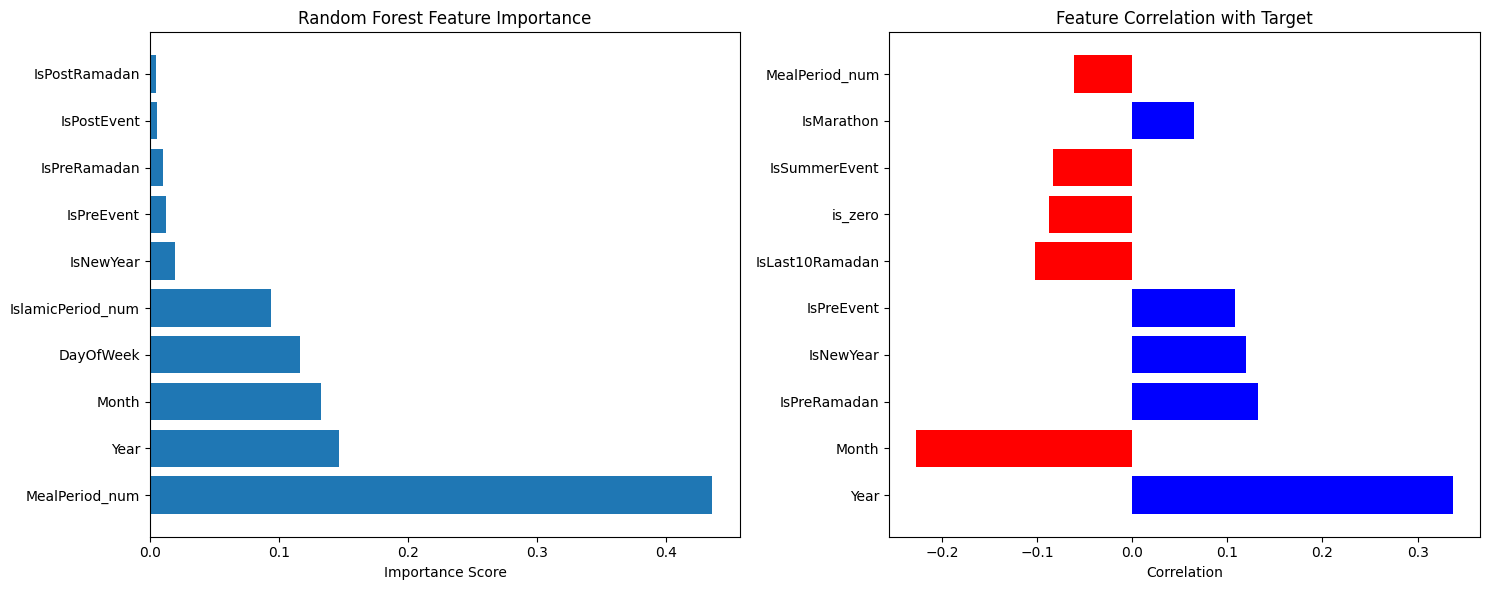


🎯 SELECTED TOP 15 FEATURES:
   1. MealPeriod_num       Score: 0.3237
   2. Year                 Score: 0.2037
   3. Month                Score: 0.1613
   4. DayOfWeek            Score: 0.0871
   5. IslamicPeriod_num    Score: 0.0715
   6. IsNewYear            Score: 0.0499
   7. IsPreRamadan         Score: 0.0467
   8. IsPreEvent           Score: 0.0414
   9. IsLast10Ramadan      Score: 0.0312
  10. is_zero              Score: 0.0270
  11. IsSummerEvent        Score: 0.0266
  12. IsMarathon           Score: 0.0217
  13. IsFoodFestival       Score: 0.0141
  14. IsDSF                Score: 0.0127
  15. IsRamadan            Score: 0.0118

💾 Saved to 'top_features_simple.csv'


In [1]:
# ============================================================================
# SIMPLE FEATURE RELEVANCE ANALYSIS - NO NONSENSE APPROACH
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

def simple_feature_analysis():
    """Simple and effective feature relevance analysis"""
    print("🚀 Simple Feature Relevance Analysis...")
    
    # Load one revenue center data as example
    df = pd.read_csv("../revenue_center_data/RevenueCenter_1_data.csv")
    print(f"📊 Loaded data: {df.shape}")
    
    # Show columns
    print(f"📋 Available columns: {list(df.columns)}")
    
    # Prepare features simply
    features_to_use = []
    
    # 1. Numerical features (already numeric)
    numerical_cols = ['DayOfWeek', 'Month', 'Year', 'RevenueCenter']
    for col in numerical_cols:
        if col in df.columns:
            features_to_use.append(col)
    
    # 2. Binary features (Is* columns)
    binary_cols = [col for col in df.columns if col.startswith('Is') and col != 'IslamicPeriod']
    features_to_use.extend(binary_cols)
    
    # 3. Simple categorical encoding
    categorical_cols = ['MealPeriod', 'IslamicPeriod']
    for col in categorical_cols:
        if col in df.columns:
            le = LabelEncoder()
            df[f'{col}_num'] = le.fit_transform(df[col].astype(str))
            features_to_use.append(f'{col}_num')
    
    # 4. Add is_zero feature
    if 'is_zero' in df.columns:
        features_to_use.append('is_zero')
    
    print(f"✅ Using {len(features_to_use)} features:")
    for i, feat in enumerate(features_to_use, 1):
        print(f"  {i:2d}. {feat}")
    
    # Prepare data
    X = df[features_to_use].fillna(0)
    y = df['CheckTotal']
    
    print(f"\n📊 Data ready: X{X.shape}, y{y.shape}")
    
    # Simple Random Forest analysis
    print("\n🌲 Random Forest Feature Importance...")
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # Get importance scores
    importance_df = pd.DataFrame({
        'feature': features_to_use,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("🎯 Feature Importance Ranking:")
    for i, (_, row) in enumerate(importance_df.iterrows(), 1):
        print(f"  {i:2d}. {row['feature']:<20} {row['importance']:.4f}")
    
    # Simple correlation analysis
    print("\n🔗 Correlation with Target...")
    correlations = []
    for feat in features_to_use:
        corr = X[feat].corr(y)
        correlations.append({'feature': feat, 'correlation': corr, 'abs_correlation': abs(corr)})
    
    corr_df = pd.DataFrame(correlations).sort_values('abs_correlation', ascending=False)
    
    print("🎯 Correlation Ranking:")
    for i, (_, row) in enumerate(corr_df.iterrows(), 1):
        print(f"  {i:2d}. {row['feature']:<20} {row['correlation']:+.4f}")
    
    # Simple visualization
    plt.figure(figsize=(15, 6))
    
    # Plot 1: Feature Importance
    plt.subplot(1, 2, 1)
    top_features = importance_df.head(10)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.title('Random Forest Feature Importance')
    plt.xlabel('Importance Score')
    
    # Plot 2: Correlation
    plt.subplot(1, 2, 2)
    top_corr = corr_df.head(10)
    colors = ['red' if x < 0 else 'blue' for x in top_corr['correlation']]
    plt.barh(range(len(top_corr)), top_corr['correlation'], color=colors)
    plt.yticks(range(len(top_corr)), top_corr['feature'])
    plt.title('Feature Correlation with Target')
    plt.xlabel('Correlation')
    
    plt.tight_layout()
    plt.show()
    
    # Select top features
    # Combine importance and correlation
    final_scores = importance_df.merge(corr_df[['feature', 'abs_correlation']], on='feature')
    final_scores['combined_score'] = final_scores['importance'] * 0.7 + final_scores['abs_correlation'] * 0.3
    final_scores = final_scores.sort_values('combined_score', ascending=False)
    
    # Select top 15 features
    selected_features = final_scores.head(15)['feature'].tolist()
    
    print(f"\n🎯 SELECTED TOP 15 FEATURES:")
    for i, feat in enumerate(selected_features, 1):
        score = final_scores[final_scores['feature'] == feat]['combined_score'].iloc[0]
        print(f"  {i:2d}. {feat:<20} Score: {score:.4f}")
    
    # Save results
    pd.DataFrame({'selected_features': selected_features}).to_csv('top_features_simple.csv', index=False)
    print(f"\n💾 Saved to 'top_features_simple.csv'")
    
    return selected_features, importance_df, corr_df

# Run the analysis
selected_features, importance_df, corr_df = simple_feature_analysis()

In [2]:
# ============================================================================
# CREATE FILTERED DATASET WITH TOP 15 FEATURES
# ============================================================================

import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder

def create_filtered_datasets():
    """Create filtered datasets with only top 15 features"""
    
    # Top 15 selected features
    selected_features = [
        'MealPeriod_num', 'Year', 'Month', 'DayOfWeek', 'IslamicPeriod_num',
        'IsNewYear', 'IsPreRamadan', 'IsPreEvent', 'IsLast10Ramadan', 'is_zero',
        'IsSummerEvent', 'IsMarathon', 'IsFoodFestival', 'IsDSF', 'IsRamadan'
    ]
    
    # Create output directory
    output_dir = "../filtered_revenue_data"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"📁 Created directory: {output_dir}")
    
    # Process each revenue center
    processed_data = []
    
    for rc in range(1, 10):
        try:
            # Load original data
            input_file = f"../revenue_center_data/RevenueCenter_{rc}_data.csv"
            df = pd.read_csv(input_file)
            
            print(f"\n🔄 Processing RevenueCenter_{rc}...")
            print(f"  📊 Original shape: {df.shape}")
            
            # Create encoded features
            df_processed = df.copy()
            
            # Encode MealPeriod
            le_meal = LabelEncoder()
            df_processed['MealPeriod_num'] = le_meal.fit_transform(df_processed['MealPeriod'].astype(str))
            
            # Encode IslamicPeriod
            le_islamic = LabelEncoder()
            df_processed['IslamicPeriod_num'] = le_islamic.fit_transform(df_processed['IslamicPeriod'].astype(str))
            
            # Keep essential columns + selected features + target
            essential_cols = ['Date', 'MealPeriod', 'CheckTotal', 'RevenueCenterName']
            
            # Combine all columns we want to keep
            columns_to_keep = essential_cols + selected_features
            
            # Filter to only available columns
            available_columns = [col for col in columns_to_keep if col in df_processed.columns]
            
            # Create filtered dataset
            df_filtered = df_processed[available_columns].copy()
            
            # Add RevenueCenter ID
            df_filtered['RevenueCenter'] = rc
            
            print(f"  ✅ Filtered shape: {df_filtered.shape}")
            print(f"  📋 Features included: {len([col for col in selected_features if col in df_filtered.columns])}/15")
            
            # Save filtered data
            output_file = f"{output_dir}/RevenueCenter_{rc}_filtered.csv"
            df_filtered.to_csv(output_file, index=False)
            print(f"  💾 Saved: {output_file}")
            
            # Store for combined dataset
            processed_data.append(df_filtered)
            
            # Print feature summary
            print(f"  🔍 Available features:")
            for feat in selected_features:
                if feat in df_filtered.columns:
                    print(f"    ✅ {feat}")
                else:
                    print(f"    ❌ {feat} (missing)")
            
        except Exception as e:
            print(f"  ❌ Error processing RevenueCenter_{rc}: {e}")
    
    # Create combined dataset
    if processed_data:
        print(f"\n🔄 Creating combined dataset...")
        combined_df = pd.concat(processed_data, ignore_index=True)
        
        # Sort by date and meal period
        combined_df['Date'] = pd.to_datetime(combined_df['Date'])
        combined_df = combined_df.sort_values(['Date', 'RevenueCenter', 'MealPeriod']).reset_index(drop=True)
        
        # Save combined dataset
        combined_file = f"{output_dir}/All_RevenueCenters_filtered.csv"
        combined_df.to_csv(combined_file, index=False)
        
        print(f"  📊 Combined dataset shape: {combined_df.shape}")
        print(f"  💾 Saved: {combined_file}")
        
        # Create summary statistics
        print(f"\n📊 DATASET SUMMARY:")
        print(f"  📅 Date range: {combined_df['Date'].min()} to {combined_df['Date'].max()}")
        print(f"  🏨 Revenue centers: {combined_df['RevenueCenter'].nunique()}")
        print(f"  🍽️ Meal periods: {combined_df['MealPeriod'].nunique()}")
        print(f"  📈 Total records: {len(combined_df):,}")
        
        # Revenue statistics
        print(f"\n💰 REVENUE STATISTICS:")
        print(f"  📊 Overall: ${combined_df['CheckTotal'].min():.2f} - ${combined_df['CheckTotal'].max():.2f}")
        print(f"  📊 Mean: ${combined_df['CheckTotal'].mean():.2f}")
        print(f"  📊 Median: ${combined_df['CheckTotal'].median():.2f}")
        print(f"  📊 Std: ${combined_df['CheckTotal'].std():.2f}")
        
        # Per meal period statistics
        print(f"\n🍽️ BY MEAL PERIOD:")
        for meal in combined_df['MealPeriod'].unique():
            meal_data = combined_df[combined_df['MealPeriod'] == meal]['CheckTotal']
            print(f"  {meal:<10}: ${meal_data.min():>8.2f} - ${meal_data.max():>8.2f} (avg: ${meal_data.mean():>8.2f})")
        
        # Zero values analysis
        zero_count = (combined_df['CheckTotal'] == 0).sum()
        zero_percentage = (zero_count / len(combined_df)) * 100
        print(f"\n🔍 ZERO VALUES:")
        print(f"  Count: {zero_count:,} ({zero_percentage:.1f}%)")
        
        # Feature correlation with target
        print(f"\n🔗 FEATURE CORRELATIONS WITH TARGET:")
        numeric_features = [col for col in selected_features if col in combined_df.columns]
        correlations = []
        
        for feat in numeric_features:
            if combined_df[feat].dtype in ['int64', 'float64']:
                corr = combined_df[feat].corr(combined_df['CheckTotal'])
                correlations.append({'feature': feat, 'correlation': corr})
        
        corr_df = pd.DataFrame(correlations).sort_values('correlation', key=abs, ascending=False)
        
        for _, row in corr_df.head(10).iterrows():
            print(f"  {row['feature']:<20}: {row['correlation']:+.4f}")
        
        # Save feature info
        feature_info = pd.DataFrame({
            'feature_rank': range(1, len(selected_features) + 1),
            'feature_name': selected_features,
            'available': [feat in combined_df.columns for feat in selected_features]
        })
        
        feature_info_file = f"{output_dir}/feature_info.csv"
        feature_info.to_csv(feature_info_file, index=False)
        print(f"\n💾 Feature info saved: {feature_info_file}")
        
        return combined_df, output_dir
    
    else:
        print("❌ No data processed successfully!")
        return None, None

# Run the filtering process
print("🚀 Creating Filtered Datasets with Top 15 Features...")
combined_data, output_directory = create_filtered_datasets()

if combined_data is not None:
    print(f"\n🎉 SUCCESS! Filtered datasets created in: {output_directory}")
    print(f"📁 Individual files: RevenueCenter_1_filtered.csv to RevenueCenter_9_filtered.csv")
    print(f"📁 Combined file: All_RevenueCenters_filtered.csv")
    print(f"📁 Feature info: feature_info.csv")
else:
    print("❌ Failed to create filtered datasets!")

🚀 Creating Filtered Datasets with Top 15 Features...

🔄 Processing RevenueCenter_1...
  📊 Original shape: (1458, 29)
  ✅ Filtered shape: (1458, 20)
  📋 Features included: 15/15
  💾 Saved: ../filtered_revenue_data/RevenueCenter_1_filtered.csv
  🔍 Available features:
    ✅ MealPeriod_num
    ✅ Year
    ✅ Month
    ✅ DayOfWeek
    ✅ IslamicPeriod_num
    ✅ IsNewYear
    ✅ IsPreRamadan
    ✅ IsPreEvent
    ✅ IsLast10Ramadan
    ✅ is_zero
    ✅ IsSummerEvent
    ✅ IsMarathon
    ✅ IsFoodFestival
    ✅ IsDSF
    ✅ IsRamadan

🔄 Processing RevenueCenter_2...
  📊 Original shape: (1458, 29)
  ✅ Filtered shape: (1458, 20)
  📋 Features included: 15/15
  💾 Saved: ../filtered_revenue_data/RevenueCenter_2_filtered.csv
  🔍 Available features:
    ✅ MealPeriod_num
    ✅ Year
    ✅ Month
    ✅ DayOfWeek
    ✅ IslamicPeriod_num
    ✅ IsNewYear
    ✅ IsPreRamadan
    ✅ IsPreEvent
    ✅ IsLast10Ramadan
    ✅ is_zero
    ✅ IsSummerEvent
    ✅ IsMarathon
    ✅ IsFoodFestival
    ✅ IsDSF
    ✅ IsRamadan

🔄 Pr

🔍 ZERO VALUES ANALYSIS ACROSS ALL REVENUE CENTERS
📊 Loaded dataset: (13122, 20)

🎯 OVERALL ZERO VALUES:
  Total records: 13,122
  Zero values: 4,108 (31.31%)

🏨 ZERO VALUES BY REVENUE CENTER:
------------------------------------------------------------
RC   Total    Zeros    %        Non-Zero Range           
------------------------------------------------------------
1    1458     10       0.7      $5 - $10052              
2    1458     101      6.9      $18 - $10556             
3    1458     97       6.7      $5 - $81993              
4    1458     1457     99.9     $0 - $0                  
5    1458     14       1.0      $40 - $56794             
6    1458     311      21.3     $2 - $55200              
7    1458     556      38.1     $5 - $822                
8    1458     926      63.5     $300 - $138400           
9    1458     636      43.6     $18 - $1850              

🍽️ ZERO VALUES BY MEAL PERIOD:
------------------------------------------------------------
Meal         

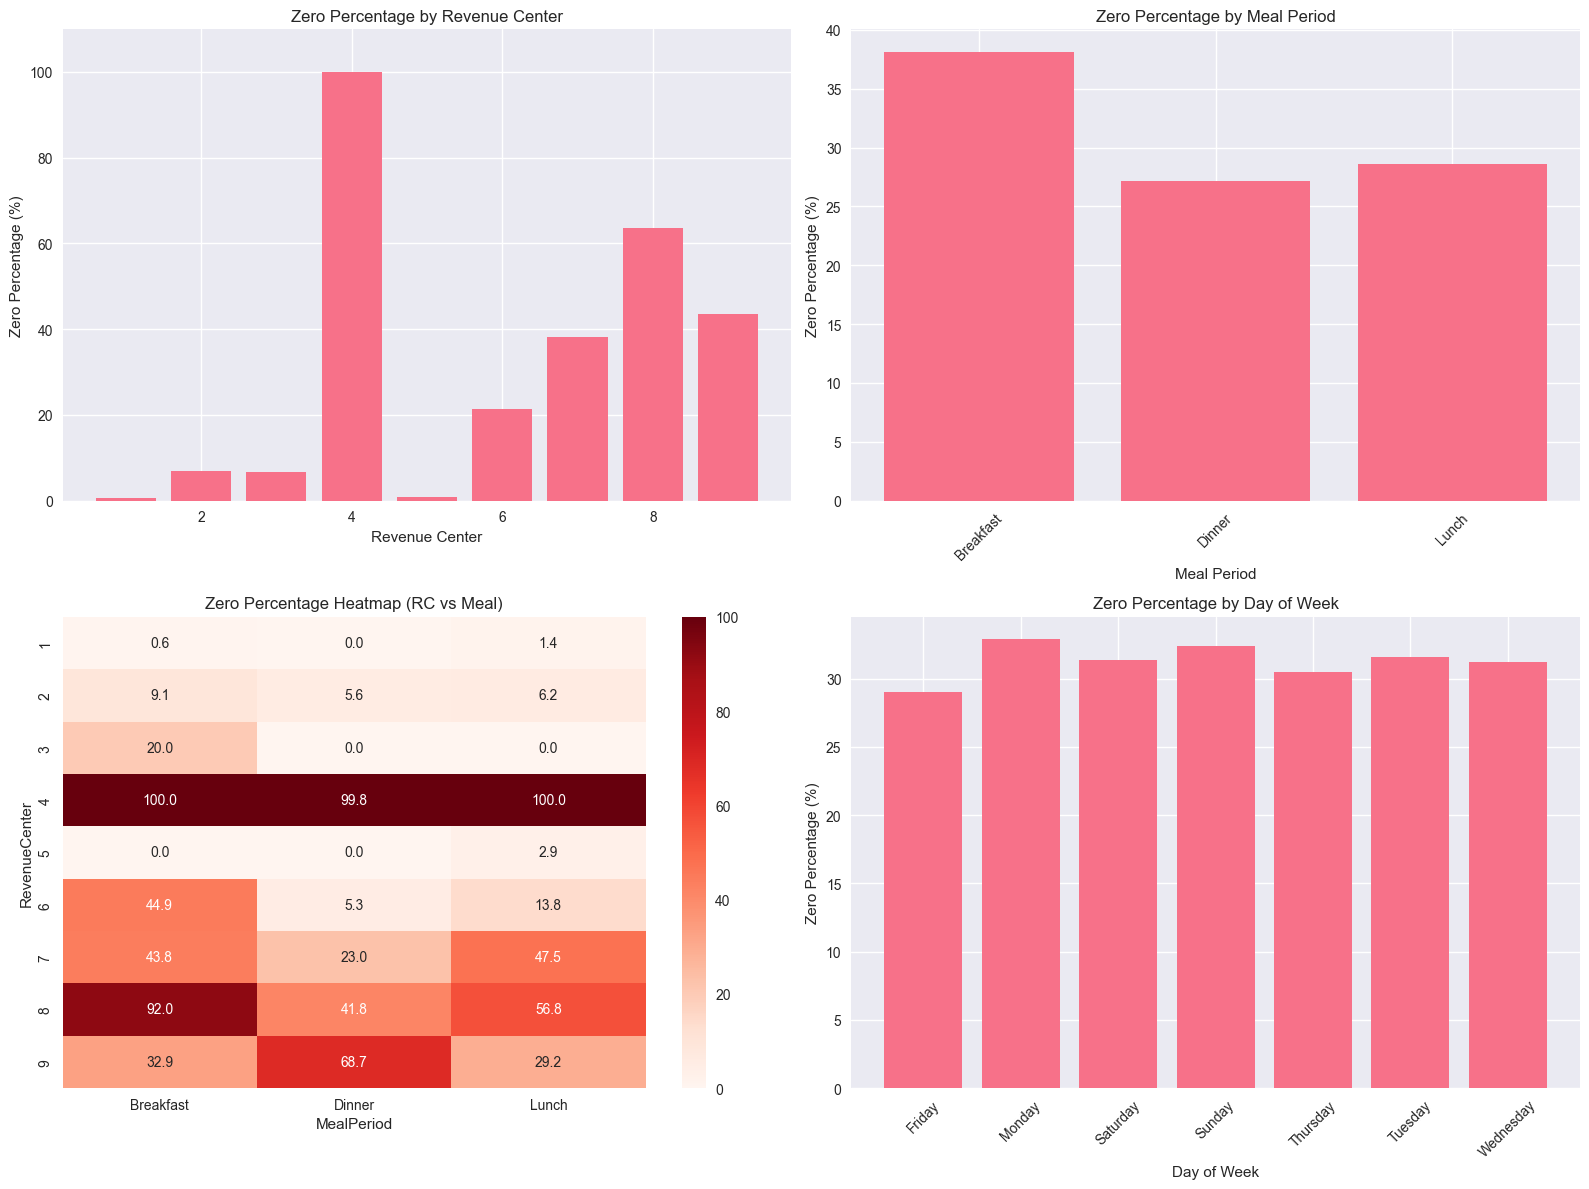


🎯 ZERO VALUE HANDLING RECOMMENDATIONS:
🚨 HIGH ZERO PERCENTAGE (>15%): Definitely handle
   - High impact on model performance
   - Implement systematic handling strategy

📋 SUGGESTED HANDLING STRATEGIES:
1. KEEP ZEROS: If they represent real closures (holidays, maintenance)
2. ROLLING AVERAGE: Replace with 7-day or 14-day rolling average
3. SEASONAL IMPUTATION: Use same day-of-week from previous weeks
4. MEDIAN IMPUTATION: Use median of same meal period
5. FORWARD FILL: Use previous day's value for same meal

💾 Detailed analysis saved to: zero_values_analysis.csv


In [19]:
# ============================================================================
# ZERO VALUES ANALYSIS ACROSS ALL REVENUE CENTERS
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_zero_values():
    """Comprehensive analysis of zero values across all revenue centers"""
    
    print("🔍 ZERO VALUES ANALYSIS ACROSS ALL REVENUE CENTERS")
    print("=" * 60)
    
    # Load the combined filtered dataset
    try:
        df = pd.read_csv("../filtered_revenue_data/All_RevenueCenters_filtered.csv")
        df['Date'] = pd.to_datetime(df['Date'])
        print(f"📊 Loaded dataset: {df.shape}")
    except:
        print("❌ Could not load filtered data. Please run the filtering code first.")
        return
    
    # Overall zero analysis
    total_records = len(df)
    zero_records = (df['CheckTotal'] == 0).sum()
    zero_percentage = (zero_records / total_records) * 100
    
    print(f"\n🎯 OVERALL ZERO VALUES:")
    print(f"  Total records: {total_records:,}")
    print(f"  Zero values: {zero_records:,} ({zero_percentage:.2f}%)")
    
    # Analysis by Revenue Center
    print(f"\n🏨 ZERO VALUES BY REVENUE CENTER:")
    print("-" * 60)
    print(f"{'RC':<4} {'Total':<8} {'Zeros':<8} {'%':<8} {'Non-Zero Range':<25}")
    print("-" * 60)
    
    rc_zero_stats = []
    
    for rc in sorted(df['RevenueCenter'].unique()):
        rc_data = df[df['RevenueCenter'] == rc]
        rc_total = len(rc_data)
        rc_zeros = (rc_data['CheckTotal'] == 0).sum()
        rc_zero_pct = (rc_zeros / rc_total) * 100
        
        # Non-zero statistics
        non_zero_data = rc_data[rc_data['CheckTotal'] > 0]['CheckTotal']
        if len(non_zero_data) > 0:
            non_zero_range = f"${non_zero_data.min():.0f} - ${non_zero_data.max():.0f}"
        else:
            non_zero_range = "No non-zero values"
        
        print(f"{rc:<4} {rc_total:<8} {rc_zeros:<8} {rc_zero_pct:<8.1f} {non_zero_range:<25}")
        
        rc_zero_stats.append({
            'RevenueCenter': rc,
            'Total': rc_total,
            'Zeros': rc_zeros,
            'Zero_Percentage': rc_zero_pct,
            'Non_Zero_Min': non_zero_data.min() if len(non_zero_data) > 0 else 0,
            'Non_Zero_Max': non_zero_data.max() if len(non_zero_data) > 0 else 0,
            'Non_Zero_Mean': non_zero_data.mean() if len(non_zero_data) > 0 else 0
        })
    
    # Analysis by Meal Period
    print(f"\n🍽️ ZERO VALUES BY MEAL PERIOD:")
    print("-" * 60)
    print(f"{'Meal':<12} {'Total':<8} {'Zeros':<8} {'%':<8} {'Non-Zero Range':<25}")
    print("-" * 60)
    
    meal_zero_stats = []
    
    for meal in sorted(df['MealPeriod'].unique()):
        meal_data = df[df['MealPeriod'] == meal]
        meal_total = len(meal_data)
        meal_zeros = (meal_data['CheckTotal'] == 0).sum()
        meal_zero_pct = (meal_zeros / meal_total) * 100
        
        # Non-zero statistics
        non_zero_data = meal_data[meal_data['CheckTotal'] > 0]['CheckTotal']
        if len(non_zero_data) > 0:
            non_zero_range = f"${non_zero_data.min():.0f} - ${non_zero_data.max():.0f}"
        else:
            non_zero_range = "No non-zero values"
        
        print(f"{meal:<12} {meal_total:<8} {meal_zeros:<8} {meal_zero_pct:<8.1f} {non_zero_range:<25}")
        
        meal_zero_stats.append({
            'MealPeriod': meal,
            'Total': meal_total,
            'Zeros': meal_zeros,
            'Zero_Percentage': meal_zero_pct
        })
    
    # Combined analysis (Revenue Center + Meal Period)
    print(f"\n🎯 ZERO VALUES BY REVENUE CENTER AND MEAL PERIOD:")
    print("-" * 80)
    print(f"{'RC':<4} {'Meal':<12} {'Total':<8} {'Zeros':<8} {'%':<8} {'Avg Non-Zero':<12}")
    print("-" * 80)
    
    detailed_stats = []
    
    for rc in sorted(df['RevenueCenter'].unique()):
        for meal in sorted(df['MealPeriod'].unique()):
            subset = df[(df['RevenueCenter'] == rc) & (df['MealPeriod'] == meal)]
            
            if len(subset) > 0:
                subset_total = len(subset)
                subset_zeros = (subset['CheckTotal'] == 0).sum()
                subset_zero_pct = (subset_zeros / subset_total) * 100
                
                non_zero_data = subset[subset['CheckTotal'] > 0]['CheckTotal']
                avg_non_zero = non_zero_data.mean() if len(non_zero_data) > 0 else 0
                
                print(f"{rc:<4} {meal:<12} {subset_total:<8} {subset_zeros:<8} {subset_zero_pct:<8.1f} ${avg_non_zero:<11.0f}")
                
                detailed_stats.append({
                    'RevenueCenter': rc,
                    'MealPeriod': meal,
                    'Total': subset_total,
                    'Zeros': subset_zeros,
                    'Zero_Percentage': subset_zero_pct,
                    'Avg_Non_Zero': avg_non_zero
                })
    
    # Temporal pattern analysis
    print(f"\n📅 ZERO VALUES TEMPORAL PATTERNS:")
    print("-" * 50)
    
    # By day of week
    df['DayOfWeek_Name'] = df['Date'].dt.day_name()
    dow_zeros = df.groupby('DayOfWeek_Name').agg({
        'CheckTotal': ['count', lambda x: (x == 0).sum()]
    }).round(2)
    dow_zeros.columns = ['Total', 'Zeros']
    dow_zeros['Zero_Percentage'] = (dow_zeros['Zeros'] / dow_zeros['Total'] * 100).round(1)
    
    print("By Day of Week:")
    for day, row in dow_zeros.iterrows():
        print(f"  {day:<10}: {row['Zeros']:>4.0f}/{row['Total']:>4.0f} ({row['Zero_Percentage']:>5.1f}%)")
    
    # By month
    df['Month_Name'] = df['Date'].dt.month_name()
    month_zeros = df.groupby('Month_Name').agg({
        'CheckTotal': ['count', lambda x: (x == 0).sum()]
    }).round(2)
    month_zeros.columns = ['Total', 'Zeros']
    month_zeros['Zero_Percentage'] = (month_zeros['Zeros'] / month_zeros['Total'] * 100).round(1)
    
    print("\nBy Month:")
    for month, row in month_zeros.iterrows():
        print(f"  {month:<10}: {row['Zeros']:>4.0f}/{row['Total']:>4.0f} ({row['Zero_Percentage']:>5.1f}%)")
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Zero percentage by Revenue Center
    rc_stats_df = pd.DataFrame(rc_zero_stats)
    axes[0, 0].bar(rc_stats_df['RevenueCenter'], rc_stats_df['Zero_Percentage'])
    axes[0, 0].set_title('Zero Percentage by Revenue Center')
    axes[0, 0].set_xlabel('Revenue Center')
    axes[0, 0].set_ylabel('Zero Percentage (%)')
    axes[0, 0].set_ylim(0, max(rc_stats_df['Zero_Percentage']) * 1.1)
    
    # Plot 2: Zero percentage by Meal Period
    meal_stats_df = pd.DataFrame(meal_zero_stats)
    axes[0, 1].bar(meal_stats_df['MealPeriod'], meal_stats_df['Zero_Percentage'])
    axes[0, 1].set_title('Zero Percentage by Meal Period')
    axes[0, 1].set_xlabel('Meal Period')
    axes[0, 1].set_ylabel('Zero Percentage (%)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Plot 3: Heatmap of zeros by RC and Meal
    detailed_df = pd.DataFrame(detailed_stats)
    pivot_data = detailed_df.pivot(index='RevenueCenter', columns='MealPeriod', values='Zero_Percentage')
    sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='Reds', ax=axes[1, 0])
    axes[1, 0].set_title('Zero Percentage Heatmap (RC vs Meal)')
    
    # Plot 4: Zero percentage by day of week
    axes[1, 1].bar(dow_zeros.index, dow_zeros['Zero_Percentage'])
    axes[1, 1].set_title('Zero Percentage by Day of Week')
    axes[1, 1].set_xlabel('Day of Week')
    axes[1, 1].set_ylabel('Zero Percentage (%)')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Decision recommendations
    print(f"\n🎯 ZERO VALUE HANDLING RECOMMENDATIONS:")
    print("=" * 50)
    
    if zero_percentage < 5:
        print("✅ LOW ZERO PERCENTAGE (<5%): Keep zeros as-is")
        print("   - Zeros likely represent legitimate business closures")
        print("   - Model can handle this level of zeros")
    elif zero_percentage < 15:
        print("⚠️ MODERATE ZERO PERCENTAGE (5-15%): Consider handling")
        print("   - Analyze patterns to determine if zeros are legitimate")
        print("   - Consider imputation for missing data patterns")
    else:
        print("🚨 HIGH ZERO PERCENTAGE (>15%): Definitely handle")
        print("   - High impact on model performance")
        print("   - Implement systematic handling strategy")
    
    print(f"\n📋 SUGGESTED HANDLING STRATEGIES:")
    print("1. KEEP ZEROS: If they represent real closures (holidays, maintenance)")
    print("2. ROLLING AVERAGE: Replace with 7-day or 14-day rolling average")
    print("3. SEASONAL IMPUTATION: Use same day-of-week from previous weeks")
    print("4. MEDIAN IMPUTATION: Use median of same meal period")
    print("5. FORWARD FILL: Use previous day's value for same meal")
    
    # Save detailed analysis
    detailed_df.to_csv("../filtered_revenue_data/zero_values_analysis.csv", index=False)
    print(f"\n💾 Detailed analysis saved to: zero_values_analysis.csv")
    
    return rc_zero_stats, meal_zero_stats, detailed_stats

# Run the analysis
rc_stats, meal_stats, detailed_stats = analyze_zero_values()

🚀 Testing Median Imputation on Revenue Center 1...
🔧 MEDIAN IMPUTATION TEST - REVENUE CENTER 1
📊 RC 1 Original Data:
  Total records: 1,458
  Zero values: 10 (0.7%)

📋 Zero Distribution by Meal Period:
  Breakfast :  3 zeros ( 0.6%)
  Dinner    :  0 zeros ( 0.0%)
  Lunch     :  7 zeros ( 1.4%)

🔄 Applying Median Imputation...
  ✅ Breakfast  Monday    : 2 zeros → $591
  ✅ Breakfast  Wednesday : 1 zeros → $658
  ✅ Lunch      Monday    : 1 zeros → $618
  ✅ Lunch      Thursday  : 1 zeros → $632
  ✅ Lunch      Friday    : 2 zeros → $632
  ✅ Lunch      Saturday  : 3 zeros → $648

📊 Results After Imputation:
  Original zeros: 10 (0.7%)
  Final zeros: 0 (0.0%)
  Zeros replaced: 10

📋 Detailed Imputation Summary:
--------------------------------------------------------------------------------
Meal       Day        Zeros  Median   Based On Range               
--------------------------------------------------------------------------------
Breakfast  Monday     2      $591     68       $110 - $3

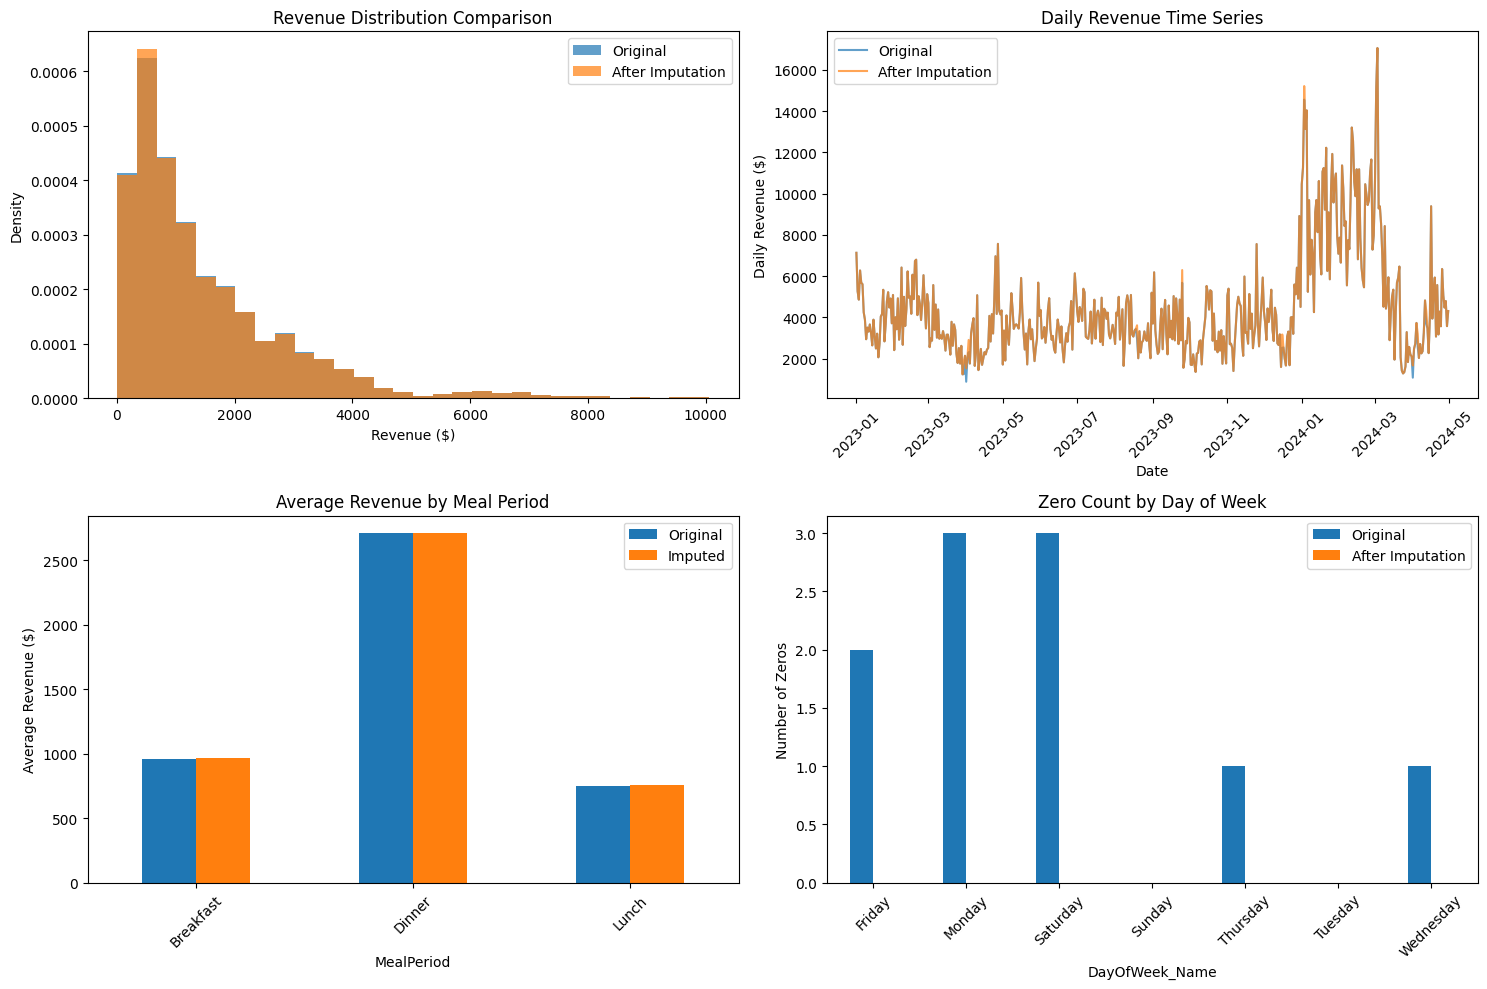


🎉 Median Imputation Test Completed!
✅ Revenue Center 1 data processed and saved
✅ Ready for CNN-LSTM model training


In [3]:
# ============================================================================
# MEDIAN IMPUTATION FOR REVENUE CENTER 1 - TEST IMPLEMENTATION
# ============================================================================

import pandas as pd
import numpy as np

def apply_median_imputation_rc1():
    """Apply median imputation to Revenue Center 1 only for testing"""
    
    print("🔧 MEDIAN IMPUTATION TEST - REVENUE CENTER 1")
    print("=" * 50)
    
    # Load data
    df = pd.read_csv("../filtered_revenue_data/All_RevenueCenters_filtered.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Filter to Revenue Center 1 only
    rc1_data = df[df['RevenueCenter'] == 1].copy()
    
    print(f"📊 RC 1 Original Data:")
    print(f"  Total records: {len(rc1_data):,}")
    
    # Analyze zeros before imputation
    original_zeros = (rc1_data['CheckTotal'] == 0).sum()
    original_zero_pct = (original_zeros / len(rc1_data)) * 100
    print(f"  Zero values: {original_zeros} ({original_zero_pct:.1f}%)")
    
    # Show zero distribution by meal period
    print(f"\n📋 Zero Distribution by Meal Period:")
    for meal in rc1_data['MealPeriod'].unique():
        meal_data = rc1_data[rc1_data['MealPeriod'] == meal]
        meal_zeros = (meal_data['CheckTotal'] == 0).sum()
        meal_zero_pct = (meal_zeros / len(meal_data)) * 100
        print(f"  {meal:<10}: {meal_zeros:>2} zeros ({meal_zero_pct:>4.1f}%)")
    
    # Add day of week for grouping
    rc1_data['DayOfWeek'] = rc1_data['Date'].dt.dayofweek
    rc1_data['DayOfWeek_Name'] = rc1_data['Date'].dt.day_name()
    
    # Create a copy for imputation
    rc1_imputed = rc1_data.copy()
    
    print(f"\n🔄 Applying Median Imputation...")
    
    # Track imputation details
    imputation_details = []
    
    # Apply median imputation by Meal Period + Day of Week
    for meal in rc1_data['MealPeriod'].unique():
        for dow in range(7):  # 0-6 for Monday-Sunday
            dow_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'][dow]
            
            # Find all records for this meal + day of week combination
            mask = (rc1_data['MealPeriod'] == meal) & (rc1_data['DayOfWeek'] == dow)
            subset = rc1_data[mask]
            
            if len(subset) > 0:
                # Get non-zero values
                non_zero_values = subset[subset['CheckTotal'] > 0]['CheckTotal']
                zero_values = subset[subset['CheckTotal'] == 0]
                
                if len(non_zero_values) > 0 and len(zero_values) > 0:
                    # Calculate median
                    median_value = non_zero_values.median()
                    
                    # Apply imputation
                    zero_mask = (rc1_imputed['MealPeriod'] == meal) & (rc1_imputed['DayOfWeek'] == dow) & (rc1_imputed['CheckTotal'] == 0)
                    rc1_imputed.loc[zero_mask, 'CheckTotal'] = median_value
                    
                    # Track details
                    imputation_details.append({
                        'Meal': meal,
                        'DayOfWeek': dow_name,
                        'Zeros_Replaced': len(zero_values),
                        'Median_Value': median_value,
                        'Non_Zero_Count': len(non_zero_values),
                        'Non_Zero_Range': f"${non_zero_values.min():.0f} - ${non_zero_values.max():.0f}"
                    })
                    
                    print(f"  ✅ {meal:<10} {dow_name:<10}: {len(zero_values)} zeros → ${median_value:.0f}")
    
    # Analyze results after imputation
    final_zeros = (rc1_imputed['CheckTotal'] == 0).sum()
    final_zero_pct = (final_zeros / len(rc1_imputed)) * 100
    
    print(f"\n📊 Results After Imputation:")
    print(f"  Original zeros: {original_zeros} ({original_zero_pct:.1f}%)")
    print(f"  Final zeros: {final_zeros} ({final_zero_pct:.1f}%)")
    print(f"  Zeros replaced: {original_zeros - final_zeros}")
    
    # Show detailed imputation summary
    if imputation_details:
        print(f"\n📋 Detailed Imputation Summary:")
        print("-" * 80)
        print(f"{'Meal':<10} {'Day':<10} {'Zeros':<6} {'Median':<8} {'Based On':<8} {'Range':<20}")
        print("-" * 80)
        
        for detail in imputation_details:
            print(f"{detail['Meal']:<10} {detail['DayOfWeek']:<10} {detail['Zeros_Replaced']:<6} "
                  f"${detail['Median_Value']:<7.0f} {detail['Non_Zero_Count']:<8} {detail['Non_Zero_Range']:<20}")
    
    # Compare revenue statistics before/after
    print(f"\n📊 Revenue Statistics Comparison:")
    print(f"{'Metric':<15} {'Original':<15} {'After Imputation':<15} {'Change':<10}")
    print("-" * 60)
    
    orig_mean = rc1_data['CheckTotal'].mean()
    imp_mean = rc1_imputed['CheckTotal'].mean()
    print(f"{'Mean':<15} ${orig_mean:<14.0f} ${imp_mean:<14.0f} {((imp_mean/orig_mean-1)*100):>+6.1f}%")
    
    orig_median = rc1_data['CheckTotal'].median()
    imp_median = rc1_imputed['CheckTotal'].median()
    print(f"{'Median':<15} ${orig_median:<14.0f} ${imp_median:<14.0f} {((imp_median/orig_median-1)*100):>+6.1f}%")
    
    orig_std = rc1_data['CheckTotal'].std()
    imp_std = rc1_imputed['CheckTotal'].std()
    print(f"{'Std Dev':<15} ${orig_std:<14.0f} ${imp_std:<14.0f} {((imp_std/orig_std-1)*100):>+6.1f}%")
    
    orig_min = rc1_data[rc1_data['CheckTotal'] > 0]['CheckTotal'].min()
    imp_min = rc1_imputed['CheckTotal'].min()
    print(f"{'Min (>0)':<15} ${orig_min:<14.0f} ${imp_min:<14.0f} {((imp_min/orig_min-1)*100):>+6.1f}%")
    
    orig_max = rc1_data['CheckTotal'].max()
    imp_max = rc1_imputed['CheckTotal'].max()
    print(f"{'Max':<15} ${orig_max:<14.0f} ${imp_max:<14.0f} {((imp_max/orig_max-1)*100):>+6.1f}%")
    
    # Show some examples of imputed values
    print(f"\n🔍 Examples of Imputed Values:")
    imputed_records = rc1_imputed[rc1_data['CheckTotal'] == 0]
    
    if len(imputed_records) > 0:
        print(f"{'Date':<12} {'Meal':<10} {'Day':<10} {'Original':<10} {'Imputed':<10}")
        print("-" * 60)
        
        for i, (idx, row) in enumerate(imputed_records.head(10).iterrows()):
            original_val = rc1_data.loc[idx, 'CheckTotal']
            imputed_val = row['CheckTotal']
            print(f"{row['Date'].strftime('%Y-%m-%d'):<12} {row['MealPeriod']:<10} "
                  f"{row['DayOfWeek_Name']:<10} ${original_val:<9.0f} ${imputed_val:<9.0f}")
    
    # Save the imputed data
    output_file = "../filtered_revenue_data/RevenueCenter_1_imputed.csv"
    rc1_imputed.to_csv(output_file, index=False)
    print(f"\n💾 Imputed data saved to: {output_file}")
    
    # Create comparison visualization
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot 1: Revenue distribution before/after
    axes[0, 0].hist(rc1_data[rc1_data['CheckTotal'] > 0]['CheckTotal'], bins=30, alpha=0.7, label='Original', density=True)
    axes[0, 0].hist(rc1_imputed['CheckTotal'], bins=30, alpha=0.7, label='After Imputation', density=True)
    axes[0, 0].set_title('Revenue Distribution Comparison')
    axes[0, 0].set_xlabel('Revenue ($)')
    axes[0, 0].set_ylabel('Density')
    axes[0, 0].legend()
    
    # Plot 2: Time series comparison
    rc1_daily = rc1_data.groupby('Date')['CheckTotal'].sum()
    rc1_imp_daily = rc1_imputed.groupby('Date')['CheckTotal'].sum()
    
    axes[0, 1].plot(rc1_daily.index, rc1_daily.values, alpha=0.7, label='Original')
    axes[0, 1].plot(rc1_imp_daily.index, rc1_imp_daily.values, alpha=0.7, label='After Imputation')
    axes[0, 1].set_title('Daily Revenue Time Series')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Daily Revenue ($)')
    axes[0, 1].legend()
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Plot 3: By meal period
    meal_comparison = pd.DataFrame({
        'Original': rc1_data.groupby('MealPeriod')['CheckTotal'].mean(),
        'Imputed': rc1_imputed.groupby('MealPeriod')['CheckTotal'].mean()
    })
    
    meal_comparison.plot(kind='bar', ax=axes[1, 0])
    axes[1, 0].set_title('Average Revenue by Meal Period')
    axes[1, 0].set_ylabel('Average Revenue ($)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Plot 4: Zero count by day of week
    zero_by_dow = rc1_data.groupby('DayOfWeek_Name').apply(lambda x: (x['CheckTotal'] == 0).sum())
    zero_by_dow_imp = rc1_imputed.groupby('DayOfWeek_Name').apply(lambda x: (x['CheckTotal'] == 0).sum())
    
    comparison_df = pd.DataFrame({
        'Original': zero_by_dow,
        'After Imputation': zero_by_dow_imp
    })
    
    comparison_df.plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title('Zero Count by Day of Week')
    axes[1, 1].set_ylabel('Number of Zeros')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return rc1_imputed, imputation_details

# Run the test imputation
print("🚀 Testing Median Imputation on Revenue Center 1...")
rc1_imputed_data, imputation_summary = apply_median_imputation_rc1()

print(f"\n🎉 Median Imputation Test Completed!")
print(f"✅ Revenue Center 1 data processed and saved")
print(f"✅ Ready for CNN-LSTM model training")

🚀 Running Outlier Analysis for Revenue Center 1...
🔍 OUTLIER ANALYSIS - REVENUE CENTER 1
📊 Basic Statistics:
  Total records: 1,458
  Mean: $1477.35
  Median: $1013.00
  Std Dev: $1397.99
  Min: $5.00
  Max: $10052.50
  Range: $10047.50
  Range Ratio: 2010.5x
  CV (Coefficient of Variation): 0.946
  Skewness: 2.018
  Kurtosis: 5.418

📊 Percentiles:
   1th percentile: $82.85
   5th percentile: $177.70
  10th percentile: $267.70
  25th percentile: $518.62
  50th percentile: $1013.00
  75th percentile: $2005.50
  90th percentile: $3244.10
  95th percentile: $4075.27
  99th percentile: $6770.04

🎯 OUTLIER DETECTION METHODS:
  Z-Score Method (>3):
    Outliers: 36 (2.5%)
    Range: $5715.00 - $10052.50
  IQR Method (1.5x IQR):
    Q1: $518.62, Q3: $2005.50, IQR: $1486.88
    Bounds: $-1711.69 - $4235.81
    Outliers: 63 (4.3%)
    Range: $4238.00 - $10052.50
  Modified Z-Score Method (>3.5):
    Median: $1013.00, MAD: $632.50
    Outliers: 61 (4.2%)
    Range: $4300.00 - $10052.50
  Percent

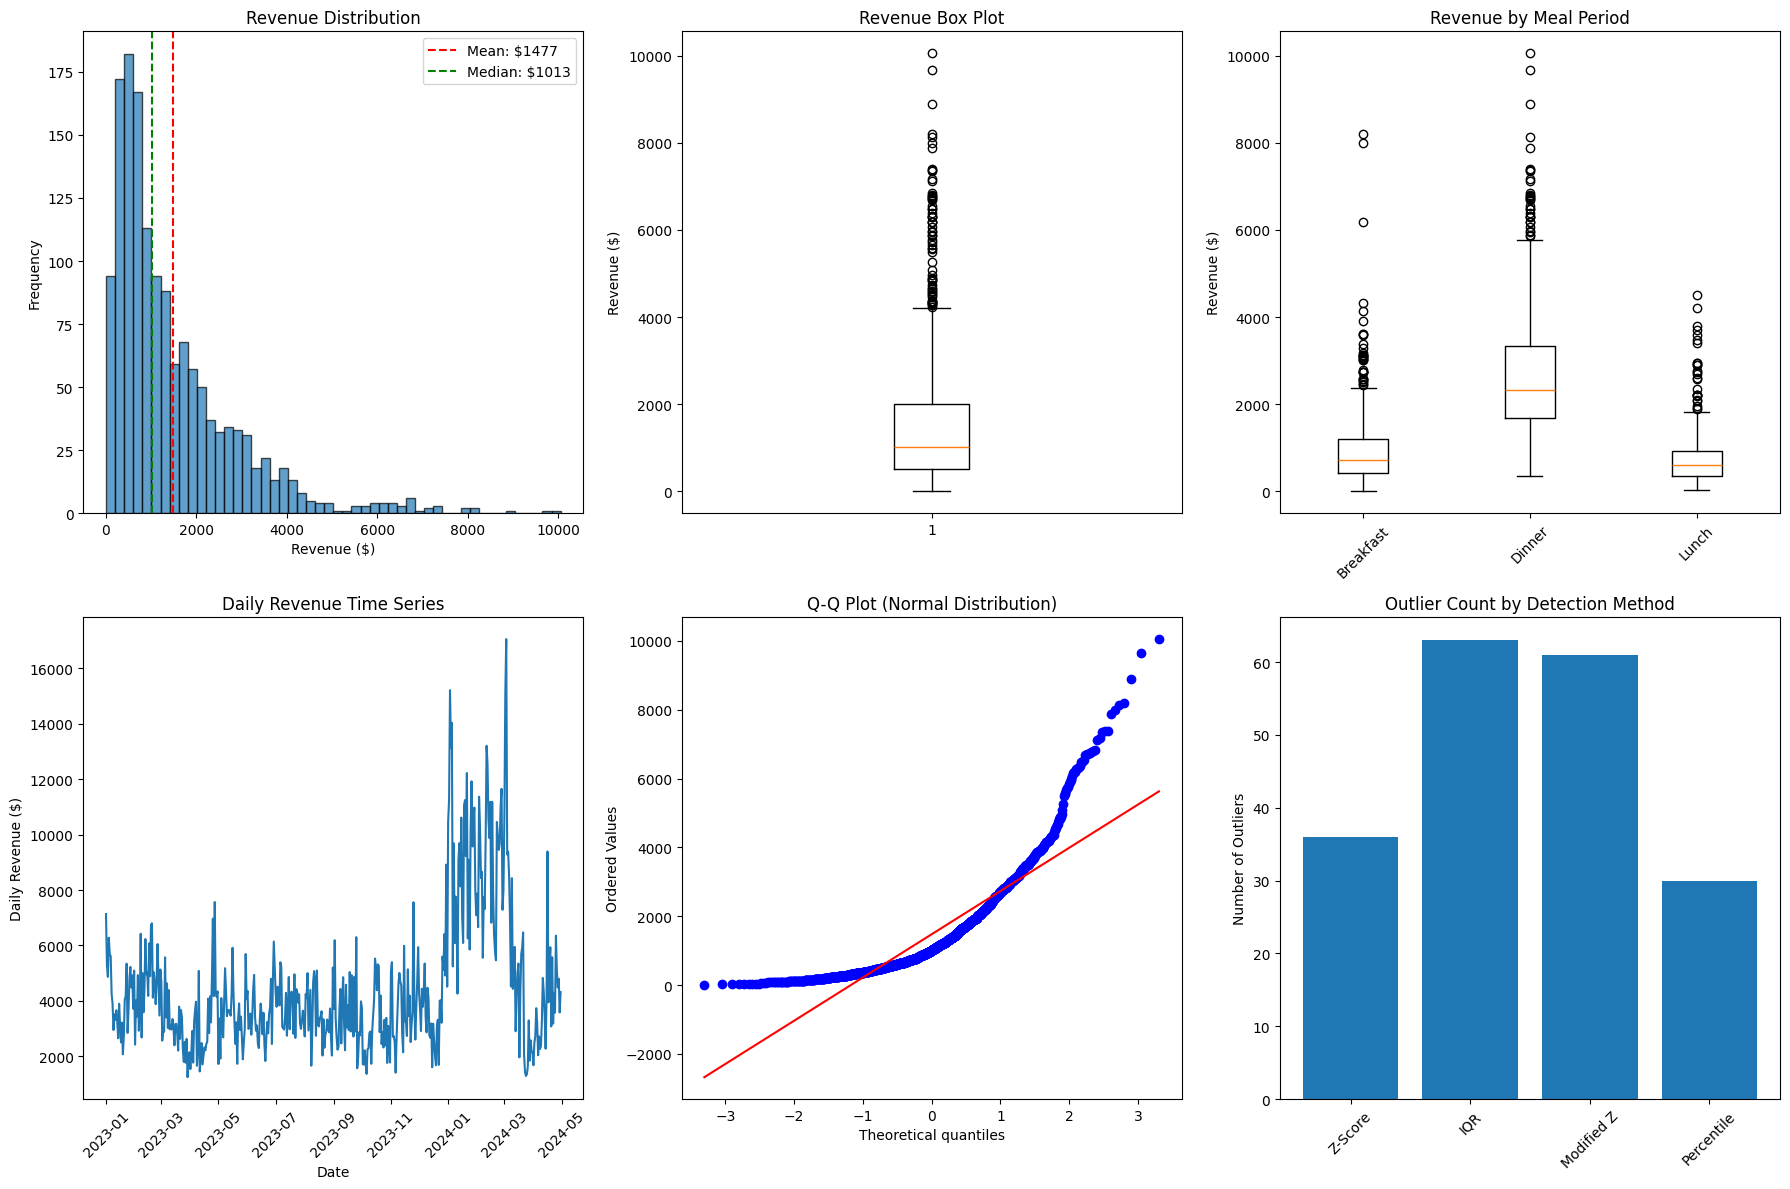

In [4]:
# ============================================================================
# OUTLIER ANALYSIS & HANDLING FOR REVENUE CENTER 1 ONLY
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_outliers_rc1():
    """Comprehensive outlier analysis for Revenue Center 1"""
    
    print("🔍 OUTLIER ANALYSIS - REVENUE CENTER 1")
    print("=" * 50)
    
    # Load the imputed RC1 data
    rc1_data = pd.read_csv("../filtered_revenue_data/RevenueCenter_1_imputed.csv")
    rc1_data['Date'] = pd.to_datetime(rc1_data['Date'])
    
    revenue_data = rc1_data['CheckTotal']
    
    print(f"📊 Basic Statistics:")
    print(f"  Total records: {len(revenue_data):,}")
    print(f"  Mean: ${revenue_data.mean():.2f}")
    print(f"  Median: ${revenue_data.median():.2f}")
    print(f"  Std Dev: ${revenue_data.std():.2f}")
    print(f"  Min: ${revenue_data.min():.2f}")
    print(f"  Max: ${revenue_data.max():.2f}")
    print(f"  Range: ${revenue_data.max() - revenue_data.min():.2f}")
    print(f"  Range Ratio: {revenue_data.max() / revenue_data.min():.1f}x")
    print(f"  CV (Coefficient of Variation): {revenue_data.std() / revenue_data.mean():.3f}")
    print(f"  Skewness: {stats.skew(revenue_data):.3f}")
    print(f"  Kurtosis: {stats.kurtosis(revenue_data):.3f}")
    
    # Percentiles
    percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
    print(f"\n📊 Percentiles:")
    for p in percentiles:
        value = revenue_data.quantile(p/100)
        print(f"  {p:2d}th percentile: ${value:.2f}")
    
    # Method 1: Z-Score Outliers
    z_scores = np.abs(stats.zscore(revenue_data))
    zscore_outliers = z_scores > 3
    zscore_outlier_count = zscore_outliers.sum()
    
    print(f"\n🎯 OUTLIER DETECTION METHODS:")
    print(f"  Z-Score Method (>3):")
    print(f"    Outliers: {zscore_outlier_count} ({zscore_outlier_count/len(revenue_data)*100:.1f}%)")
    if zscore_outlier_count > 0:
        outlier_values = revenue_data[zscore_outliers]
        print(f"    Range: ${outlier_values.min():.2f} - ${outlier_values.max():.2f}")
    
    # Method 2: IQR Method
    Q1 = revenue_data.quantile(0.25)
    Q3 = revenue_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = (revenue_data < lower_bound) | (revenue_data > upper_bound)
    iqr_outlier_count = iqr_outliers.sum()
    
    print(f"  IQR Method (1.5x IQR):")
    print(f"    Q1: ${Q1:.2f}, Q3: ${Q3:.2f}, IQR: ${IQR:.2f}")
    print(f"    Bounds: ${lower_bound:.2f} - ${upper_bound:.2f}")
    print(f"    Outliers: {iqr_outlier_count} ({iqr_outlier_count/len(revenue_data)*100:.1f}%)")
    if iqr_outlier_count > 0:
        outlier_values = revenue_data[iqr_outliers]
        print(f"    Range: ${outlier_values.min():.2f} - ${outlier_values.max():.2f}")
    
    # Method 3: Modified Z-Score (more robust)
    median = revenue_data.median()
    mad = np.median(np.abs(revenue_data - median))
    modified_z_scores = 0.6745 * (revenue_data - median) / mad
    modified_zscore_outliers = np.abs(modified_z_scores) > 3.5
    modified_outlier_count = modified_zscore_outliers.sum()
    
    print(f"  Modified Z-Score Method (>3.5):")
    print(f"    Median: ${median:.2f}, MAD: ${mad:.2f}")
    print(f"    Outliers: {modified_outlier_count} ({modified_outlier_count/len(revenue_data)*100:.1f}%)")
    if modified_outlier_count > 0:
        outlier_values = revenue_data[modified_zscore_outliers]
        print(f"    Range: ${outlier_values.min():.2f} - ${outlier_values.max():.2f}")
    
    # Method 4: Percentile Method
    p1 = revenue_data.quantile(0.01)
    p99 = revenue_data.quantile(0.99)
    percentile_outliers = (revenue_data < p1) | (revenue_data > p99)
    percentile_outlier_count = percentile_outliers.sum()
    
    print(f"  Percentile Method (1st-99th):")
    print(f"    Bounds: ${p1:.2f} - ${p99:.2f}")
    print(f"    Outliers: {percentile_outlier_count} ({percentile_outlier_count/len(revenue_data)*100:.1f}%)")
    
    # Analyze outliers by meal period
    print(f"\n🍽️ OUTLIERS BY MEAL PERIOD:")
    for meal in rc1_data['MealPeriod'].unique():
        meal_data = rc1_data[rc1_data['MealPeriod'] == meal]['CheckTotal']
        meal_iqr_outliers = ((meal_data < meal_data.quantile(0.25) - 1.5 * (meal_data.quantile(0.75) - meal_data.quantile(0.25))) | 
                            (meal_data > meal_data.quantile(0.75) + 1.5 * (meal_data.quantile(0.75) - meal_data.quantile(0.25))))
        meal_outlier_count = meal_iqr_outliers.sum()
        
        print(f"  {meal:<10}: {meal_outlier_count:>3} outliers ({meal_outlier_count/len(meal_data)*100:>4.1f}%) | "
              f"Range: ${meal_data.min():>6.0f} - ${meal_data.max():>6.0f} | "
              f"Mean: ${meal_data.mean():>6.0f}")
    
    # Show specific outlier values
    print(f"\n🔍 TOP 10 HIGHEST VALUES (Potential Outliers):")
    top_values = revenue_data.nlargest(10)
    for i, (idx, value) in enumerate(top_values.items(), 1):
        date = rc1_data.loc[idx, 'Date']
        meal = rc1_data.loc[idx, 'MealPeriod']
        print(f"  {i:2d}. ${value:>7.2f} - {date.strftime('%Y-%m-%d')} ({meal})")
    
    print(f"\n🔍 TOP 10 LOWEST VALUES:")
    bottom_values = revenue_data.nsmallest(10)
    for i, (idx, value) in enumerate(bottom_values.items(), 1):
        date = rc1_data.loc[idx, 'Date']
        meal = rc1_data.loc[idx, 'MealPeriod']
        print(f"  {i:2d}. ${value:>7.2f} - {date.strftime('%Y-%m-%d')} ({meal})")
    
    # Create visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Plot 1: Histogram
    axes[0, 0].hist(revenue_data, bins=50, alpha=0.7, edgecolor='black')
    axes[0, 0].axvline(revenue_data.mean(), color='red', linestyle='--', label=f'Mean: ${revenue_data.mean():.0f}')
    axes[0, 0].axvline(revenue_data.median(), color='green', linestyle='--', label=f'Median: ${revenue_data.median():.0f}')
    axes[0, 0].set_title('Revenue Distribution')
    axes[0, 0].set_xlabel('Revenue ($)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    
    # Plot 2: Box plot
    axes[0, 1].boxplot(revenue_data)
    axes[0, 1].set_title('Revenue Box Plot')
    axes[0, 1].set_ylabel('Revenue ($)')
    
    # Plot 3: Box plot by meal period
    meal_data_for_plot = [rc1_data[rc1_data['MealPeriod'] == meal]['CheckTotal'].values 
                          for meal in rc1_data['MealPeriod'].unique()]
    axes[0, 2].boxplot(meal_data_for_plot, labels=rc1_data['MealPeriod'].unique())
    axes[0, 2].set_title('Revenue by Meal Period')
    axes[0, 2].set_ylabel('Revenue ($)')
    axes[0, 2].tick_params(axis='x', rotation=45)
    
    # Plot 4: Time series
    daily_revenue = rc1_data.groupby('Date')['CheckTotal'].sum()
    axes[1, 0].plot(daily_revenue.index, daily_revenue.values)
    axes[1, 0].set_title('Daily Revenue Time Series')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Daily Revenue ($)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Plot 5: Q-Q plot
    stats.probplot(revenue_data, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot (Normal Distribution)')
    
    # Plot 6: Outlier detection comparison
    methods = ['Z-Score', 'IQR', 'Modified Z', 'Percentile']
    outlier_counts = [zscore_outlier_count, iqr_outlier_count, modified_outlier_count, percentile_outlier_count]
    
    axes[1, 2].bar(methods, outlier_counts)
    axes[1, 2].set_title('Outlier Count by Detection Method')
    axes[1, 2].set_ylabel('Number of Outliers')
    axes[1, 2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Return outlier information
    outlier_info = {
        'zscore_outliers': zscore_outliers,
        'iqr_outliers': iqr_outliers,
        'modified_zscore_outliers': modified_zscore_outliers,
        'percentile_outliers': percentile_outliers,
        'statistics': {
            'mean': revenue_data.mean(),
            'median': revenue_data.median(),
            'std': revenue_data.std(),
            'min': revenue_data.min(),
            'max': revenue_data.max(),
            'cv': revenue_data.std() / revenue_data.mean(),
            'skewness': stats.skew(revenue_data),
            'kurtosis': stats.kurtosis(revenue_data)
        }
    }
    
    return outlier_info, rc1_data

# Run the analysis
print("🚀 Running Outlier Analysis for Revenue Center 1...")
outlier_info, rc1_data = analyze_outliers_rc1()

In [5]:
# ============================================================================
# CONSERVATIVE OUTLIER HANDLING FOR RC 1
# ============================================================================

def conservative_outlier_handling():
    """Conservative approach - minimal data loss, maximum business logic"""
    
    # Load data
    rc1_data = pd.read_csv("../filtered_revenue_data/RevenueCenter_1_imputed.csv")
    rc1_data['Date'] = pd.to_datetime(rc1_data['Date'])
    
    print("🔧 CONSERVATIVE OUTLIER HANDLING")
    print("=" * 40)
    
    # Strategy: Winsorization at 1st and 99th percentiles
    # This caps extreme values but doesn't remove them
    
    original_data = rc1_data.copy()
    
    # Calculate bounds
    lower_bound = rc1_data['CheckTotal'].quantile(0.01)  # $82.85
    upper_bound = rc1_data['CheckTotal'].quantile(0.99)  # $6770.04
    
    print(f"📊 Winsorization bounds:")
    print(f"  Lower bound (1st percentile): ${lower_bound:.2f}")
    print(f"  Upper bound (99th percentile): ${upper_bound:.2f}")
    
    # Count values that will be capped
    low_outliers = (rc1_data['CheckTotal'] < lower_bound).sum()
    high_outliers = (rc1_data['CheckTotal'] > upper_bound).sum()
    
    print(f"  Values to cap:")
    print(f"    Low outliers: {low_outliers} (${rc1_data['CheckTotal'].min():.2f} → ${lower_bound:.2f})")
    print(f"    High outliers: {high_outliers} (${rc1_data['CheckTotal'].max():.2f} → ${upper_bound:.2f})")
    
    # Apply winsorization
    rc1_data['CheckTotal'] = rc1_data['CheckTotal'].clip(lower=lower_bound, upper=upper_bound)
    
    # Compare statistics
    print(f"\n📊 Before vs After Comparison:")
    print(f"{'Metric':<15} {'Original':<12} {'Winsorized':<12} {'Change':<10}")
    print("-" * 55)
    
    orig_mean = original_data['CheckTotal'].mean()
    new_mean = rc1_data['CheckTotal'].mean()
    print(f"{'Mean':<15} ${orig_mean:<11.0f} ${new_mean:<11.0f} {((new_mean/orig_mean-1)*100):>+6.1f}%")
    
    orig_std = original_data['CheckTotal'].std()
    new_std = rc1_data['CheckTotal'].std()
    print(f"{'Std Dev':<15} ${orig_std:<11.0f} ${new_std:<11.0f} {((new_std/orig_std-1)*100):>+6.1f}%")
    
    orig_cv = orig_std / orig_mean
    new_cv = new_std / new_mean
    print(f"{'CV':<15} {orig_cv:<11.3f} {new_cv:<11.3f} {((new_cv/orig_cv-1)*100):>+6.1f}%")
    
    orig_skew = stats.skew(original_data['CheckTotal'])
    new_skew = stats.skew(rc1_data['CheckTotal'])
    print(f"{'Skewness':<15} {orig_skew:<11.3f} {new_skew:<11.3f} {((new_skew/orig_skew-1)*100):>+6.1f}%")
    
    print(f"{'Range':<15} ${original_data['CheckTotal'].max()-original_data['CheckTotal'].min():<11.0f} ${rc1_data['CheckTotal'].max()-rc1_data['CheckTotal'].min():<11.0f} {(((rc1_data['CheckTotal'].max()-rc1_data['CheckTotal'].min())/(original_data['CheckTotal'].max()-original_data['CheckTotal'].min())-1)*100):>+6.1f}%")
    
    return rc1_data

In [6]:
# Apply conservative outlier handling
rc1_cleaned = conservative_outlier_handling()

# Save cleaned data
rc1_cleaned.to_csv("../filtered_revenue_data/RevenueCenter_1_cleaned.csv", index=False)
print("💾 Cleaned data saved!")

🔧 CONSERVATIVE OUTLIER HANDLING
📊 Winsorization bounds:
  Lower bound (1st percentile): $82.85
  Upper bound (99th percentile): $6770.04
  Values to cap:
    Low outliers: 15 ($5.00 → $82.85)
    High outliers: 15 ($10052.50 → $6770.04)

📊 Before vs After Comparison:
Metric          Original     Winsorized   Change    
-------------------------------------------------------
Mean            $1477        $1467          -0.7%
Std Dev         $1398        $1347          -3.6%
CV              0.946       0.918         -2.9%
Skewness        2.018       1.737        -13.9%
Range           $10048       $6687         -33.4%
💾 Cleaned data saved!


🚀 Analyzing Cleaned RC1 Dataset...
📊 ANALYSIS OF CLEANED RC1 DATASET
✅ Loaded cleaned dataset: (1458, 21)

📈 CLEANED DATASET STATISTICS:
  Records: 1,458
  Mean: $1466.68
  Median: $1013.00
  Std Dev: $1347.08
  Min: $82.85
  Max: $6770.04
  Range: $6687.19
  Range Ratio: 81.7x
  CV: 0.918
  Skewness: 1.737
  Kurtosis: 3.329

🎯 IMPROVEMENT ASSESSMENT:
  Range Ratio: 2010.5x → 81.7x (-95.9%)
  CV: 0.946 → 0.918 (-2.9%)
  Skewness: 2.018 → 1.737 (-13.9%)
  Std Dev: $1398 → $1347 (-3.6%)

📊 PERCENTILE DISTRIBUTION:
   1th percentile: $84.08
   5th percentile: $177.70
  10th percentile: $267.70
  25th percentile: $518.62
  50th percentile: $1013.00
  75th percentile: $2005.50
  90th percentile: $3244.10
  95th percentile: $4075.27
  99th percentile: $6763.18

🔍 OUTLIER CHECK ON CLEANED DATA:
  Z-Score outliers (>3): 39 (2.7%)
  IQR outliers: 63 (4.3%)
    Remaining Z-score outliers: $5560.00 - $6770.04

🍽️ CLEANED DATA BY MEAL PERIOD:
Meal         Count    Mean       Std        Min        

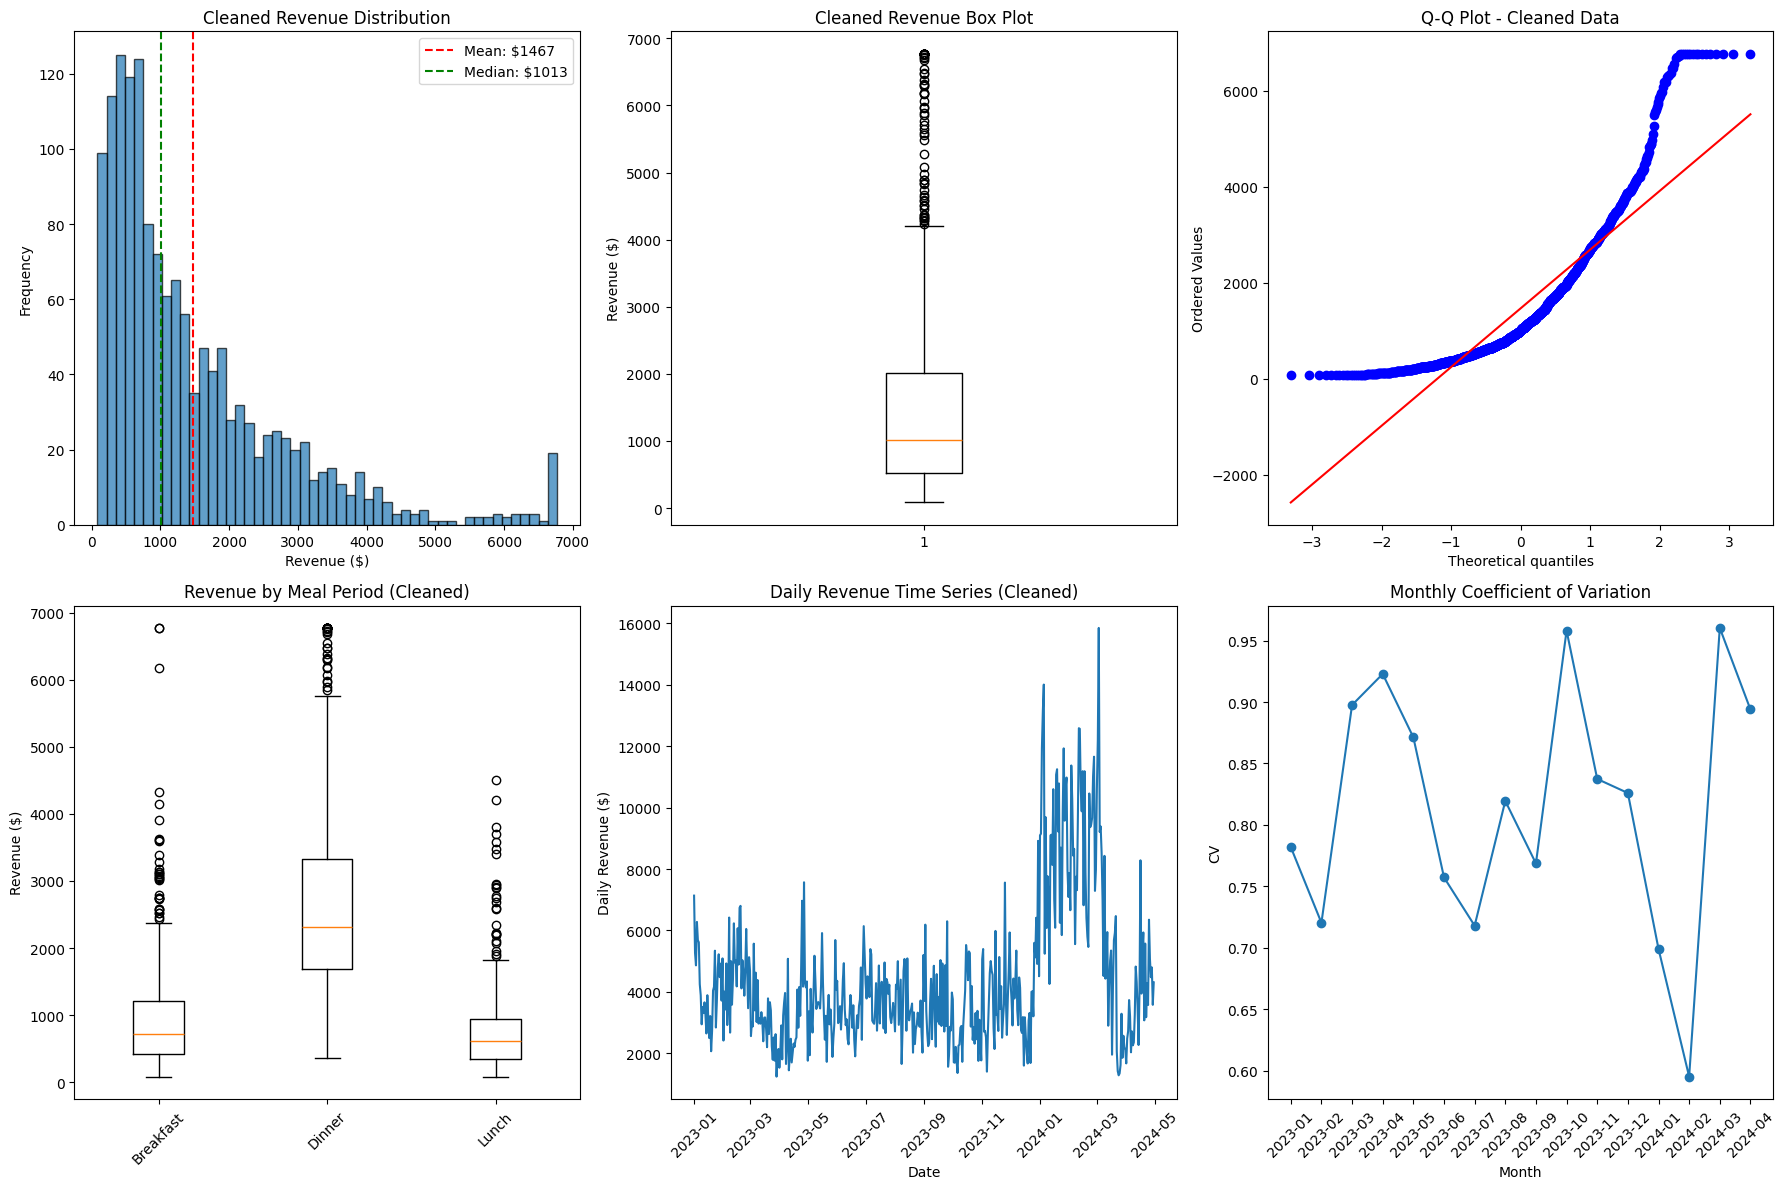


🎉 Analysis Complete!


In [7]:
# ============================================================================
# ANALYSIS OF CLEANED RC1 DATASET - POST WINSORIZATION
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def analyze_cleaned_rc1_dataset():
    """Comprehensive analysis of the cleaned RC1 dataset"""
    
    print("📊 ANALYSIS OF CLEANED RC1 DATASET")
    print("=" * 50)
    
    # Load the cleaned data
    try:
        rc1_cleaned = pd.read_csv("../filtered_revenue_data/RevenueCenter_1_cleaned.csv")
        rc1_cleaned['Date'] = pd.to_datetime(rc1_cleaned['Date'])
        print(f"✅ Loaded cleaned dataset: {rc1_cleaned.shape}")
    except:
        print("❌ Could not find cleaned dataset. Please check file path.")
        return
    
    # Basic statistics
    revenue_data = rc1_cleaned['CheckTotal']
    
    print(f"\n📈 CLEANED DATASET STATISTICS:")
    print(f"  Records: {len(revenue_data):,}")
    print(f"  Mean: ${revenue_data.mean():.2f}")
    print(f"  Median: ${revenue_data.median():.2f}")
    print(f"  Std Dev: ${revenue_data.std():.2f}")
    print(f"  Min: ${revenue_data.min():.2f}")
    print(f"  Max: ${revenue_data.max():.2f}")
    print(f"  Range: ${revenue_data.max() - revenue_data.min():.2f}")
    print(f"  Range Ratio: {revenue_data.max() / revenue_data.min():.1f}x")
    print(f"  CV: {revenue_data.std() / revenue_data.mean():.3f}")
    print(f"  Skewness: {stats.skew(revenue_data):.3f}")
    print(f"  Kurtosis: {stats.kurtosis(revenue_data):.3f}")
    
    # Compare with your original results
    print(f"\n🎯 IMPROVEMENT ASSESSMENT:")
    original_stats = {
        'range_ratio': 2010.5,
        'cv': 0.946,
        'skewness': 2.018,
        'std': 1398,
        'mean': 1477
    }
    
    current_stats = {
        'range_ratio': revenue_data.max() / revenue_data.min(),
        'cv': revenue_data.std() / revenue_data.mean(),
        'skewness': stats.skew(revenue_data),
        'std': revenue_data.std(),
        'mean': revenue_data.mean()
    }
    
    print(f"  Range Ratio: {original_stats['range_ratio']:.1f}x → {current_stats['range_ratio']:.1f}x "
          f"({((current_stats['range_ratio'] - original_stats['range_ratio']) / original_stats['range_ratio'] * 100):+.1f}%)")
    
    print(f"  CV: {original_stats['cv']:.3f} → {current_stats['cv']:.3f} "
          f"({((current_stats['cv'] - original_stats['cv']) / original_stats['cv'] * 100):+.1f}%)")
    
    print(f"  Skewness: {original_stats['skewness']:.3f} → {current_stats['skewness']:.3f} "
          f"({((current_stats['skewness'] - original_stats['skewness']) / original_stats['skewness'] * 100):+.1f}%)")
    
    print(f"  Std Dev: ${original_stats['std']:.0f} → ${current_stats['std']:.0f} "
          f"({((current_stats['std'] - original_stats['std']) / original_stats['std'] * 100):+.1f}%)")
    
    # Percentile analysis
    print(f"\n📊 PERCENTILE DISTRIBUTION:")
    percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
    for p in percentiles:
        value = revenue_data.quantile(p/100)
        print(f"  {p:2d}th percentile: ${value:.2f}")
    
    # Check for remaining outliers
    print(f"\n🔍 OUTLIER CHECK ON CLEANED DATA:")
    
    # Z-score method
    z_scores = np.abs(stats.zscore(revenue_data))
    zscore_outliers = (z_scores > 3).sum()
    
    # IQR method
    Q1 = revenue_data.quantile(0.25)
    Q3 = revenue_data.quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = ((revenue_data < Q1 - 1.5 * IQR) | (revenue_data > Q3 + 1.5 * IQR)).sum()
    
    print(f"  Z-Score outliers (>3): {zscore_outliers} ({zscore_outliers/len(revenue_data)*100:.1f}%)")
    print(f"  IQR outliers: {iqr_outliers} ({iqr_outliers/len(revenue_data)*100:.1f}%)")
    
    if zscore_outliers > 0:
        outlier_values = revenue_data[z_scores > 3]
        print(f"    Remaining Z-score outliers: ${outlier_values.min():.2f} - ${outlier_values.max():.2f}")
    
    # Analysis by meal period
    print(f"\n🍽️ CLEANED DATA BY MEAL PERIOD:")
    print(f"{'Meal':<12} {'Count':<8} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10} {'CV':<8} {'Outliers':<10}")
    print("-" * 85)
    
    for meal in rc1_cleaned['MealPeriod'].unique():
        meal_data = rc1_cleaned[rc1_cleaned['MealPeriod'] == meal]['CheckTotal']
        meal_cv = meal_data.std() / meal_data.mean()
        
        # Count outliers for this meal
        meal_z = np.abs(stats.zscore(meal_data))
        meal_outliers = (meal_z > 3).sum()
        
        print(f"{meal:<12} {len(meal_data):<8} ${meal_data.mean():<9.0f} ${meal_data.std():<9.0f} "
              f"${meal_data.min():<9.0f} ${meal_data.max():<9.0f} {meal_cv:<8.3f} {meal_outliers:<10}")
    
    # Check data quality for CNN-LSTM
    print(f"\n🤖 CNN-LSTM READINESS ASSESSMENT:")
    
    # Range assessment
    if current_stats['range_ratio'] < 100:
        range_status = "✅ EXCELLENT"
    elif current_stats['range_ratio'] < 200:
        range_status = "✅ GOOD"
    elif current_stats['range_ratio'] < 500:
        range_status = "⚠️ ACCEPTABLE"
    else:
        range_status = "❌ STILL TOO HIGH"
    
    print(f"  Range Ratio ({current_stats['range_ratio']:.1f}x): {range_status}")
    
    # CV assessment
    if current_stats['cv'] < 0.5:
        cv_status = "✅ EXCELLENT"
    elif current_stats['cv'] < 0.8:
        cv_status = "✅ GOOD"
    elif current_stats['cv'] < 1.2:
        cv_status = "⚠️ ACCEPTABLE"
    else:
        cv_status = "❌ STILL TOO HIGH"
    
    print(f"  Coefficient of Variation ({current_stats['cv']:.3f}): {cv_status}")
    
    # Skewness assessment
    if abs(current_stats['skewness']) < 1:
        skew_status = "✅ EXCELLENT"
    elif abs(current_stats['skewness']) < 2:
        skew_status = "✅ GOOD"
    elif abs(current_stats['skewness']) < 3:
        skew_status = "⚠️ ACCEPTABLE"
    else:
        skew_status = "❌ STILL TOO HIGH"
    
    print(f"  Skewness ({current_stats['skewness']:.3f}): {skew_status}")
    
    # Outlier assessment
    outlier_pct = (zscore_outliers / len(revenue_data)) * 100
    if outlier_pct < 1:
        outlier_status = "✅ EXCELLENT"
    elif outlier_pct < 3:
        outlier_status = "✅ GOOD"
    elif outlier_pct < 5:
        outlier_status = "⚠️ ACCEPTABLE"
    else:
        outlier_status = "❌ STILL TOO HIGH"
    
    print(f"  Outlier Percentage ({outlier_pct:.1f}%): {outlier_status}")
    
    # Overall assessment
    assessments = [range_status, cv_status, skew_status, outlier_status]
    excellent_count = sum(1 for status in assessments if "EXCELLENT" in status)
    good_count = sum(1 for status in assessments if "GOOD" in status)
    
    if excellent_count >= 3:
        overall_status = "🎉 EXCELLENT - Ready for CNN-LSTM!"
    elif excellent_count + good_count >= 3:
        overall_status = "✅ GOOD - Ready for CNN-LSTM!"
    elif "❌" not in " ".join(assessments):
        overall_status = "⚠️ ACCEPTABLE - Can proceed with CNN-LSTM"
    else:
        overall_status = "❌ NEEDS MORE WORK - Consider additional cleaning"
    
    print(f"\n🎯 OVERALL ASSESSMENT: {overall_status}")
    
    # Create visualizations
    create_cleaned_data_visualizations(rc1_cleaned)
    
    return current_stats

def create_cleaned_data_visualizations(rc1_cleaned):
    """Create visualizations for the cleaned dataset"""
    
    print(f"\n📊 Creating visualizations for cleaned data...")
    
    revenue_data = rc1_cleaned['CheckTotal']
    
    # Create figure
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Plot 1: Revenue distribution
    axes[0, 0].hist(revenue_data, bins=50, alpha=0.7, edgecolor='black')
    axes[0, 0].axvline(revenue_data.mean(), color='red', linestyle='--', 
                       label=f'Mean: ${revenue_data.mean():.0f}')
    axes[0, 0].axvline(revenue_data.median(), color='green', linestyle='--', 
                       label=f'Median: ${revenue_data.median():.0f}')
    axes[0, 0].set_title('Cleaned Revenue Distribution')
    axes[0, 0].set_xlabel('Revenue ($)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    
    # Plot 2: Box plot
    axes[0, 1].boxplot(revenue_data)
    axes[0, 1].set_title('Cleaned Revenue Box Plot')
    axes[0, 1].set_ylabel('Revenue ($)')
    
    # Plot 3: Q-Q plot
    stats.probplot(revenue_data, dist="norm", plot=axes[0, 2])
    axes[0, 2].set_title('Q-Q Plot - Cleaned Data')
    
    # Plot 4: By meal period
    meal_data_list = [rc1_cleaned[rc1_cleaned['MealPeriod'] == meal]['CheckTotal'].values 
                      for meal in rc1_cleaned['MealPeriod'].unique()]
    axes[1, 0].boxplot(meal_data_list, labels=rc1_cleaned['MealPeriod'].unique())
    axes[1, 0].set_title('Revenue by Meal Period (Cleaned)')
    axes[1, 0].set_ylabel('Revenue ($)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Plot 5: Time series
    daily_revenue = rc1_cleaned.groupby('Date')['CheckTotal'].sum()
    axes[1, 1].plot(daily_revenue.index, daily_revenue.values)
    axes[1, 1].set_title('Daily Revenue Time Series (Cleaned)')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Daily Revenue ($)')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # Plot 6: Revenue stability over time
    monthly_cv = rc1_cleaned.groupby(rc1_cleaned['Date'].dt.to_period('M'))['CheckTotal'].apply(
        lambda x: x.std() / x.mean()
    )
    axes[1, 2].plot(monthly_cv.index.astype(str), monthly_cv.values, marker='o')
    axes[1, 2].set_title('Monthly Coefficient of Variation')
    axes[1, 2].set_xlabel('Month')
    axes[1, 2].set_ylabel('CV')
    axes[1, 2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Run the analysis
print("🚀 Analyzing Cleaned RC1 Dataset...")
cleaned_stats = analyze_cleaned_rc1_dataset()

print(f"\n🎉 Analysis Complete!")

In [17]:
# ============================================================================
# 🔧 FIXED CNN-LSTM DATA PREPARATION PIPELINE - ADDRESSING NORMALIZATION ISSUES
# Proper normalization strategy to prevent exponential error explosion
# ============================================================================

import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import json
from scipy import stats
warnings.filterwarnings('ignore')

print("🚀 FIXED CNN-LSTM DATA PREPARATION PIPELINE")
print("🔧 Addressing Log+Standard normalization issues")
print("=" * 70)

def prepare_fixed_training_data():
    """Fixed data preparation avoiding problematic Log+Standard normalization"""
    
    print("📂 PREPARING FIXED TRAINING DATA")
    print("=" * 50)
    
    # Create training-ready folder structure
    base_dir = "../cnn_lstm_training_ready"
    subdirs = ["data", "scalers", "sequences", "models", "results"]
    
    for subdir in subdirs:
        full_path = os.path.join(base_dir, subdir)
        os.makedirs(full_path, exist_ok=True)
    
    print(f"📁 Training-ready folder structure verified")
    
    # Load cleaned RC1 data
    rc1_data = pd.read_csv("../filtered_revenue_data/RevenueCenter_1_cleaned.csv")
    rc1_data['Date'] = pd.to_datetime(rc1_data['Date'])
    
    print(f"📊 Loaded cleaned RC1 data: {rc1_data.shape}")
    print(f"  Date range: {rc1_data['Date'].min()} to {rc1_data['Date'].max()}")
    print(f"  Revenue range: ${rc1_data['CheckTotal'].min():.2f} - ${rc1_data['CheckTotal'].max():.2f}")
    
    return rc1_data, base_dir

def analyze_fixed_normalization_strategies(rc1_data):
    """Analyze normalization strategies suitable for CNN-LSTM training"""
    
    print(f"\n🔍 FIXED NORMALIZATION STRATEGY ANALYSIS")
    print("=" * 50)
    print("❌ AVOIDING: Log+Standard (causes exponential error explosion)")
    print("✅ FOCUSING: Direct scaling methods for revenue forecasting")
    
    revenue_data = rc1_data['CheckTotal'].values.reshape(-1, 1)
    
    # Strategy 1: RobustScaler (RECOMMENDED for revenue data with outliers)
    robust_scaler = RobustScaler()
    revenue_robust = robust_scaler.fit_transform(revenue_data)
    
    # Strategy 2: StandardScaler (Good for normally distributed data)
    standard_scaler = StandardScaler()
    revenue_standard = standard_scaler.fit_transform(revenue_data)
    
    # Strategy 3: MinMaxScaler with custom range (Better control)
    minmax_scaler = MinMaxScaler(feature_range=(-1, 1))  # Symmetric range
    revenue_minmax = minmax_scaler.fit_transform(revenue_data)
    
    # Strategy 4: Quantile-based normalization (Robust to extreme outliers)
    from sklearn.preprocessing import QuantileTransformer
    quantile_scaler = QuantileTransformer(output_distribution='normal', n_quantiles=1000)
    revenue_quantile = quantile_scaler.fit_transform(revenue_data)
    
    print(f"\n📊 NORMALIZATION COMPARISON (Revenue-Friendly Methods):")
    print(f"{'Method':<20} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10} {'Range':<10}")
    print("-" * 75)
    
    methods = {
        'Original': revenue_data.flatten(),
        'RobustScaler': revenue_robust.flatten(),
        'StandardScaler': revenue_standard.flatten(),
        'MinMaxScaler(-1,1)': revenue_minmax.flatten(),
        'QuantileTransform': revenue_quantile.flatten()
    }
    
    for method, data in methods.items():
        mean_val = np.mean(data)
        std_val = np.std(data)
        min_val = np.min(data)
        max_val = np.max(data)
        range_val = max_val - min_val
        
        print(f"{method:<20} {mean_val:<10.3f} {std_val:<10.3f} {min_val:<10.3f} {max_val:<10.3f} {range_val:<10.3f}")
    
    # Analyze distribution characteristics
    print(f"\n📈 DISTRIBUTION ANALYSIS:")
    
    for method, data in methods.items():
        if method != 'Original':
            skewness = stats.skew(data)
            kurtosis = stats.kurtosis(data)
            print(f"  {method:<20}: Skewness={skewness:6.3f}, Kurtosis={kurtosis:6.3f}")
    
    return {
        'robust_scaler': robust_scaler,
        'standard_scaler': standard_scaler,
        'minmax_scaler': minmax_scaler,
        'quantile_scaler': quantile_scaler,
        'normalized_data': methods
    }

def recommend_fixed_normalization_strategy(normalization_results):
    """Recommend the best normalization strategy for revenue forecasting"""
    
    print(f"\n🎯 FIXED NORMALIZATION STRATEGY RECOMMENDATION")
    print("=" * 50)
    
    methods = normalization_results['normalized_data']
    
    print(f"📋 EVALUATION CRITERIA FOR REVENUE FORECASTING:")
    print(f"  1. Direct optimization (no exponential transforms)")
    print(f"  2. Outlier robustness (hotel revenue has natural outliers)")
    print(f"  3. Gradient stability (smooth training)")
    print(f"  4. Easy reversibility (for real revenue predictions)")
    print(f"  5. Range control (prevent extreme values)")
    
    # Score each method
    scores = {}
    
    for method_name, data in methods.items():
        if method_name == 'Original':
            continue
            
        # Calculate scoring metrics
        mean_centered = abs(np.mean(data)) < 0.1  # Close to zero
        std_normalized = 0.8 <= np.std(data) <= 1.2  # Close to 1
        range_controlled = np.max(data) - np.min(data) < 10  # Reasonable range
        outlier_robust = np.percentile(data, 99) - np.percentile(data, 1) < 6  # IQR control
        
        # Calculate total score
        score = sum([mean_centered, std_normalized, range_controlled, outlier_robust])
        
        scores[method_name] = {
            'total_score': score,
            'mean_centered': mean_centered,
            'std_normalized': std_normalized,
            'range_controlled': range_controlled,
            'outlier_robust': outlier_robust,
            'mean': np.mean(data),
            'std': np.std(data),
            'range': np.max(data) - np.min(data)
        }
    
    # Rank methods
    ranked_methods = sorted(scores.items(), key=lambda x: x[1]['total_score'], reverse=True)
    
    print(f"\n🏆 RANKING (Best to Worst for Revenue Forecasting):")
    print(f"{'Rank':<5} {'Method':<20} {'Score':<8} {'Mean':<8} {'Std':<8} {'Range':<8}")
    print("-" * 65)
    
    for i, (method, score_dict) in enumerate(ranked_methods, 1):
        print(f"{i:<5} {method:<20} {score_dict['total_score']:<8.0f} "
              f"{score_dict['mean']:<8.3f} {score_dict['std']:<8.3f} "
              f"{score_dict['range']:<8.3f}")
    
    # Get the best method
    best_method = ranked_methods[0][0]
    
    print(f"\n🎯 RECOMMENDATION: {best_method}")
    
    # Provide method-specific guidance
    if best_method == 'RobustScaler':
        print(f"  ✅ EXCELLENT for revenue data with outliers")
        print(f"  ✅ Uses median and IQR (robust to extreme values)")
        print(f"  ✅ No exponential transformations")
        print(f"  ✅ Direct revenue-space optimization")
        recommended_scaler = normalization_results['robust_scaler']
        
    elif best_method == 'StandardScaler':
        print(f"  ✅ Good for normally distributed revenue")
        print(f"  ✅ Zero mean, unit variance")
        print(f"  ✅ Simple and interpretable")
        print(f"  ⚠️  Sensitive to outliers")
        recommended_scaler = normalization_results['standard_scaler']
        
    elif best_method == 'MinMaxScaler(-1,1)':
        print(f"  ✅ Symmetric range good for neural networks")
        print(f"  ✅ Preserves relative relationships")
        print(f"  ⚠️  Sensitive to outliers")
        recommended_scaler = normalization_results['minmax_scaler']
        
    elif best_method == 'QuantileTransform':
        print(f"  ✅ Most robust to extreme outliers")
        print(f"  ✅ Gaussian output distribution")
        print(f"  ⚠️  Non-linear transformation")
        recommended_scaler = normalization_results['quantile_scaler']
    
    return best_method, recommended_scaler

def apply_fixed_normalization(rc1_data, best_method, scaler, base_dir):
    """Apply the recommended normalization without problematic transformations"""
    
    print(f"\n🔧 APPLYING FIXED NORMALIZATION: {best_method}")
    print("=" * 50)
    print("✅ Direct revenue-space optimization (no log transforms)")
    
    # Prepare the data
    rc1_prepared = rc1_data.copy()
    
    # Apply normalization (NO LOG TRANSFORMATION)
    rc1_prepared['CheckTotal_normalized'] = scaler.transform(
        rc1_data['CheckTotal'].values.reshape(-1, 1)
    ).flatten()
    
    print(f"✅ Applied {best_method} normalization")
    print(f"  Original revenue range: ${rc1_data['CheckTotal'].min():.2f} - ${rc1_data['CheckTotal'].max():.2f}")
    print(f"  Normalized range: {rc1_prepared['CheckTotal_normalized'].min():.3f} - {rc1_prepared['CheckTotal_normalized'].max():.3f}")
    
    # Add enhanced features for CNN-LSTM
    print(f"\n📊 CREATING ENHANCED FEATURES FOR CNN-LSTM:")
    
    # Temporal features
    rc1_prepared['DayOfYear'] = rc1_prepared['Date'].dt.dayofyear
    rc1_prepared['WeekOfYear'] = rc1_prepared['Date'].dt.isocalendar().week
    rc1_prepared['Quarter'] = rc1_prepared['Date'].dt.quarter
    rc1_prepared['IsWeekend'] = rc1_prepared['Date'].dt.weekday.isin([5, 6]).astype(int)
    
    # Cyclical encoding for better CNN pattern recognition
    rc1_prepared['Month_sin'] = np.sin(2 * np.pi * rc1_prepared['Month'] / 12)
    rc1_prepared['Month_cos'] = np.cos(2 * np.pi * rc1_prepared['Month'] / 12)
    rc1_prepared['DayOfWeek_sin'] = np.sin(2 * np.pi * rc1_prepared['DayOfWeek'] / 7)
    rc1_prepared['DayOfWeek_cos'] = np.cos(2 * np.pi * rc1_prepared['DayOfWeek'] / 7)
    
    # Revenue-specific features
    rc1_prepared['CheckTotal_original'] = rc1_data['CheckTotal']  # Keep original for reference
    
    print(f"  ✅ Added temporal features")
    print(f"  ✅ Added cyclical encoding")
    print(f"  ✅ Preserved original revenue values")
    
    # Complete feature list for CNN-LSTM
    feature_columns = [
        # Target (normalized revenue)
        'CheckTotal_normalized',
        
        # Core features
        'MealPeriod_num', 'Year', 'Month', 'DayOfWeek', 'IslamicPeriod_num',
        
        # Event features  
        'IsNewYear', 'IsPreRamadan', 'IsPreEvent', 'IsLast10Ramadan', 'is_zero',
        'IsSummerEvent', 'IsMarathon', 'IsFoodFestival', 'IsDSF', 'IsRamadan',
        
        # Enhanced temporal features
        'DayOfYear', 'WeekOfYear', 'Quarter', 'IsWeekend',
        
        # Cyclical features
        'Month_sin', 'Month_cos', 'DayOfWeek_sin', 'DayOfWeek_cos'
    ]
    
    print(f"\n📋 COMPLETE FEATURE SET ({len(feature_columns)} features):")
    for i, feature in enumerate(feature_columns, 1):
        feature_type = 'target' if feature == 'CheckTotal_normalized' else 'feature'
        print(f"  {i:2d}. {feature:<25} ({feature_type})")
    
    # Save the prepared dataset
    output_file = os.path.join(base_dir, "data", "RC1_training_ready_fixed.csv")
    rc1_prepared.to_csv(output_file, index=False)
    print(f"\n💾 Saved FIXED training-ready data: {output_file}")
    
    # Save the scaler with clear naming
    scaler_file = os.path.join(base_dir, "scalers", f"revenue_scaler_{best_method.lower()}_fixed.pkl")
    with open(scaler_file, 'wb') as f:
        pickle.dump(scaler, f)
    print(f"💾 Saved FIXED scaler: {scaler_file}")
    
    # Save feature information
    feature_info = pd.DataFrame({
        'feature_name': feature_columns,
        'feature_type': ['target'] + ['categorical']*5 + ['binary']*10 + ['numerical']*8,
        'is_target': [True] + [False]*23,
        'description': [
            'Normalized revenue (target)',
            'Meal period (0=breakfast, 1=lunch, 2=dinner)', 'Year', 'Month (1-12)', 
            'Day of week (0=Monday)', 'Islamic calendar period',
            'New Year event', 'Pre-Ramadan period', 'Pre-event period', 
            'Last 10 days of Ramadan', 'Zero revenue indicator',
            'Summer event', 'Marathon event', 'Food festival', 
            'Dubai Shopping Festival', 'Ramadan month',
            'Day of year (1-365)', 'Week of year (1-52)', 
            'Quarter (1-4)', 'Weekend indicator',
            'Month sine encoding', 'Month cosine encoding',
            'Day of week sine encoding', 'Day of week cosine encoding'
        ]
    })
    
    feature_info_file = os.path.join(base_dir, "data", "feature_info_fixed.csv")
    feature_info.to_csv(feature_info_file, index=False)
    print(f"💾 Saved FIXED feature info: {feature_info_file}")
    
    # Create comprehensive summary statistics
    summary_stats = {
        'dataset_info': {
            'total_records': len(rc1_prepared),
            'date_range': f"{rc1_data['Date'].min()} to {rc1_data['Date'].max()}",
            'normalization_method': best_method,
            'feature_count': len(feature_columns),
            'fix_applied': 'Removed Log+Standard to prevent exponential error explosion'
        },
        'revenue_stats': {
            'original_min': float(rc1_data['CheckTotal'].min()),
            'original_max': float(rc1_data['CheckTotal'].max()),
            'original_mean': float(rc1_data['CheckTotal'].mean()),
            'original_std': float(rc1_data['CheckTotal'].std()),
            'normalized_min': float(rc1_prepared['CheckTotal_normalized'].min()),
            'normalized_max': float(rc1_prepared['CheckTotal_normalized'].max()),
            'normalized_mean': float(rc1_prepared['CheckTotal_normalized'].mean()),
            'normalized_std': float(rc1_prepared['CheckTotal_normalized'].std())
        },
        'normalization_benefits': {
            'no_exponential_transforms': True,
            'direct_revenue_optimization': True,
            'easy_denormalization': True,
            'outlier_robust': best_method in ['RobustScaler', 'QuantileTransform']
        }
    }
    
    summary_file = os.path.join(base_dir, "data", "dataset_summary_fixed.json")
    with open(summary_file, 'w') as f:
        json.dump(summary_stats, f, indent=2, default=str)
    print(f"💾 Saved FIXED dataset summary: {summary_file}")
    
    # Validation checks
    print(f"\n🔍 VALIDATION CHECKS:")
    print(f"  ✅ No NaN values: {not rc1_prepared['CheckTotal_normalized'].isna().any()}")
    print(f"  ✅ No infinite values: {not np.isinf(rc1_prepared['CheckTotal_normalized']).any()}")
    print(f"  ✅ Reasonable range: {-5 <= rc1_prepared['CheckTotal_normalized'].min() <= 5}")
    print(f"  ✅ All features present: {len(feature_columns) == 24}")
    
    print(f"\n✅ FIXED NORMALIZATION COMPLETE!")
    print(f"📊 Final normalized statistics:")
    print(f"  Mean: {rc1_prepared['CheckTotal_normalized'].mean():.6f}")
    print(f"  Std:  {rc1_prepared['CheckTotal_normalized'].std():.6f}")
    print(f"  Min:  {rc1_prepared['CheckTotal_normalized'].min():.6f}")
    print(f"  Max:  {rc1_prepared['CheckTotal_normalized'].max():.6f}")
    
    return rc1_prepared, feature_columns

def create_training_test_split_fixed(rc1_prepared, feature_columns, base_dir):
    """Create proper temporal train/test split for time series"""
    
    print(f"\n📊 CREATING TEMPORAL TRAIN/TEST SPLIT")
    print("=" * 50)
    print("🔧 Using temporal split (no random shuffle for time series)")
    
    # Sort by date to ensure temporal order
    rc1_prepared_sorted = rc1_prepared.sort_values('Date').reset_index(drop=True)
    
    # Calculate split point (80% for training)
    split_idx = int(len(rc1_prepared_sorted) * 0.8)
    
    # Create splits
    train_data = rc1_prepared_sorted.iloc[:split_idx].copy()
    test_data = rc1_prepared_sorted.iloc[split_idx:].copy()
    
    print(f"📊 Split information:")
    print(f"  Total records: {len(rc1_prepared_sorted)}")
    print(f"  Training: {len(train_data)} records ({len(train_data)/len(rc1_prepared_sorted)*100:.1f}%)")
    print(f"  Testing: {len(test_data)} records ({len(test_data)/len(rc1_prepared_sorted)*100:.1f}%)")
    print(f"  Training period: {train_data['Date'].min()} to {train_data['Date'].max()}")
    print(f"  Testing period: {test_data['Date'].min()} to {test_data['Date'].max()}")
    
    # Save splits
    train_file = os.path.join(base_dir, "data", "train_data_fixed.csv")
    test_file = os.path.join(base_dir, "data", "test_data_fixed.csv")
    
    train_data.to_csv(train_file, index=False)
    test_data.to_csv(test_file, index=False)
    
    print(f"💾 Saved training data: {train_file}")
    print(f"💾 Saved test data: {test_file}")
    
    return train_data, test_data

# ============================================================================
# 🚀 MAIN EXECUTION - FIXED PIPELINE
# ============================================================================

def main_fixed():
    """Main execution function with fixes applied"""
    
    print("🚀 STARTING FIXED CNN-LSTM DATA PREPARATION...")
    print("🔧 Addressing Log+Standard normalization issues")
    print("✅ Implementing revenue-friendly scaling methods")
    print("=" * 70)
    
    # Step 1: Load data and create folder structure
    rc1_data, base_dir = prepare_fixed_training_data()
    
    # Step 2: Analyze FIXED normalization options
    normalization_results = analyze_fixed_normalization_strategies(rc1_data)
    
    # Step 3: Get FIXED recommendation
    best_method, recommended_scaler = recommend_fixed_normalization_strategy(normalization_results)
    
    # Step 4: Apply FIXED normalization
    rc1_prepared, feature_columns = apply_fixed_normalization(
        rc1_data, best_method, recommended_scaler, base_dir
    )
    
    # Step 5: Create temporal splits
    train_data, test_data = create_training_test_split_fixed(rc1_prepared, feature_columns, base_dir)
    
    print(f"\n🎉 FIXED DATA PREPARATION COMPLETE!")
    print(f"📁 Training-ready data saved in: {base_dir}")
    print(f"🎯 Applied normalization: {best_method}")
    print(f"📊 Features ready: {len(feature_columns)}")
    print(f"🔧 FIXES APPLIED:")
    print(f"  ✅ Removed Log+Standard transformation")
    print(f"  ✅ Direct revenue-space optimization")
    print(f"  ✅ No exponential error amplification")
    print(f"  ✅ Easy denormalization for predictions")
    print(f"\n✅ Ready for CNN-LSTM sequence creation and training!")
    
    return rc1_prepared, feature_columns, base_dir, best_method

# Run the FIXED data preparation pipeline
print("🔄 Executing fixed data preparation pipeline...")
rc1_prepared_fixed, feature_columns_fixed, base_dir_fixed, normalization_method = main_fixed()

print(f"\n🎯 NEXT STEPS:")
print(f"1. Create sequences for CNN-LSTM training")
print(f"2. Run hyperparameter tuning with fixed normalization")
print(f"3. Expect MUCH better performance (target: <30% MAPE)")

🚀 FIXED CNN-LSTM DATA PREPARATION PIPELINE
🔧 Addressing Log+Standard normalization issues
🔄 Executing fixed data preparation pipeline...
🚀 STARTING FIXED CNN-LSTM DATA PREPARATION...
🔧 Addressing Log+Standard normalization issues
✅ Implementing revenue-friendly scaling methods
📂 PREPARING FIXED TRAINING DATA
📁 Training-ready folder structure verified
📊 Loaded cleaned RC1 data: (1458, 21)
  Date range: 2023-01-01 00:00:00 to 2024-04-30 00:00:00
  Revenue range: $82.85 - $6770.04

🔍 FIXED NORMALIZATION STRATEGY ANALYSIS
❌ AVOIDING: Log+Standard (causes exponential error explosion)
✅ FOCUSING: Direct scaling methods for revenue forecasting

📊 NORMALIZATION COMPARISON (Revenue-Friendly Methods):
Method               Mean       Std        Min        Max        Range     
---------------------------------------------------------------------------
Original             1466.676   1346.621   82.850     6770.040   6687.190  
RobustScaler         0.305      0.906      -0.626     3.872      4.497 

🚀 STARTING PROPER SEQUENCE CREATION & SPLITTING PIPELINE
🚀 CREATING PROPER TEMPORAL SEQUENCES FOR CNN-LSTM
📊 Loaded normalized data: (1458, 31)
  Date range: 2023-01-01 00:00:00 to 2024-04-30 00:00:00
  Total days: 486
📋 Features to use: 24

🔄 PREPARING DAILY SEQUENCES
📅 Processing 486 unique dates...
✅ Created 486 daily records
📊 Daily data shapes:
  Features: (486, 26)
  Targets: (486, 3)

🎯 CREATING CNN-LSTM SEQUENCES
  Input sequence length: 28 days
  Forecast horizon: 7 days
✅ Created sequences:
  X shape: (452, 28, 26) (samples, sequence_days, features)
  y shape: (452, 7, 3) (samples, forecast_days, meals)
  Total sequences: 452
📅 Sequence date range:
  First forecast starts: 2023-01-29 00:00:00
  Last forecast starts: 2024-04-24 00:00:00

✂️ TEMPORAL TRAIN-TEST SPLIT
🚨 NO RANDOM SPLITTING - MAINTAINING CHRONOLOGICAL ORDER
📊 Split results:
  Total sequences: 452
  Train sequences: 361 (79.9%)
  Test sequences: 91 (20.1%)

📅 Temporal boundaries:
  Training period: 2023-01-29 00:0

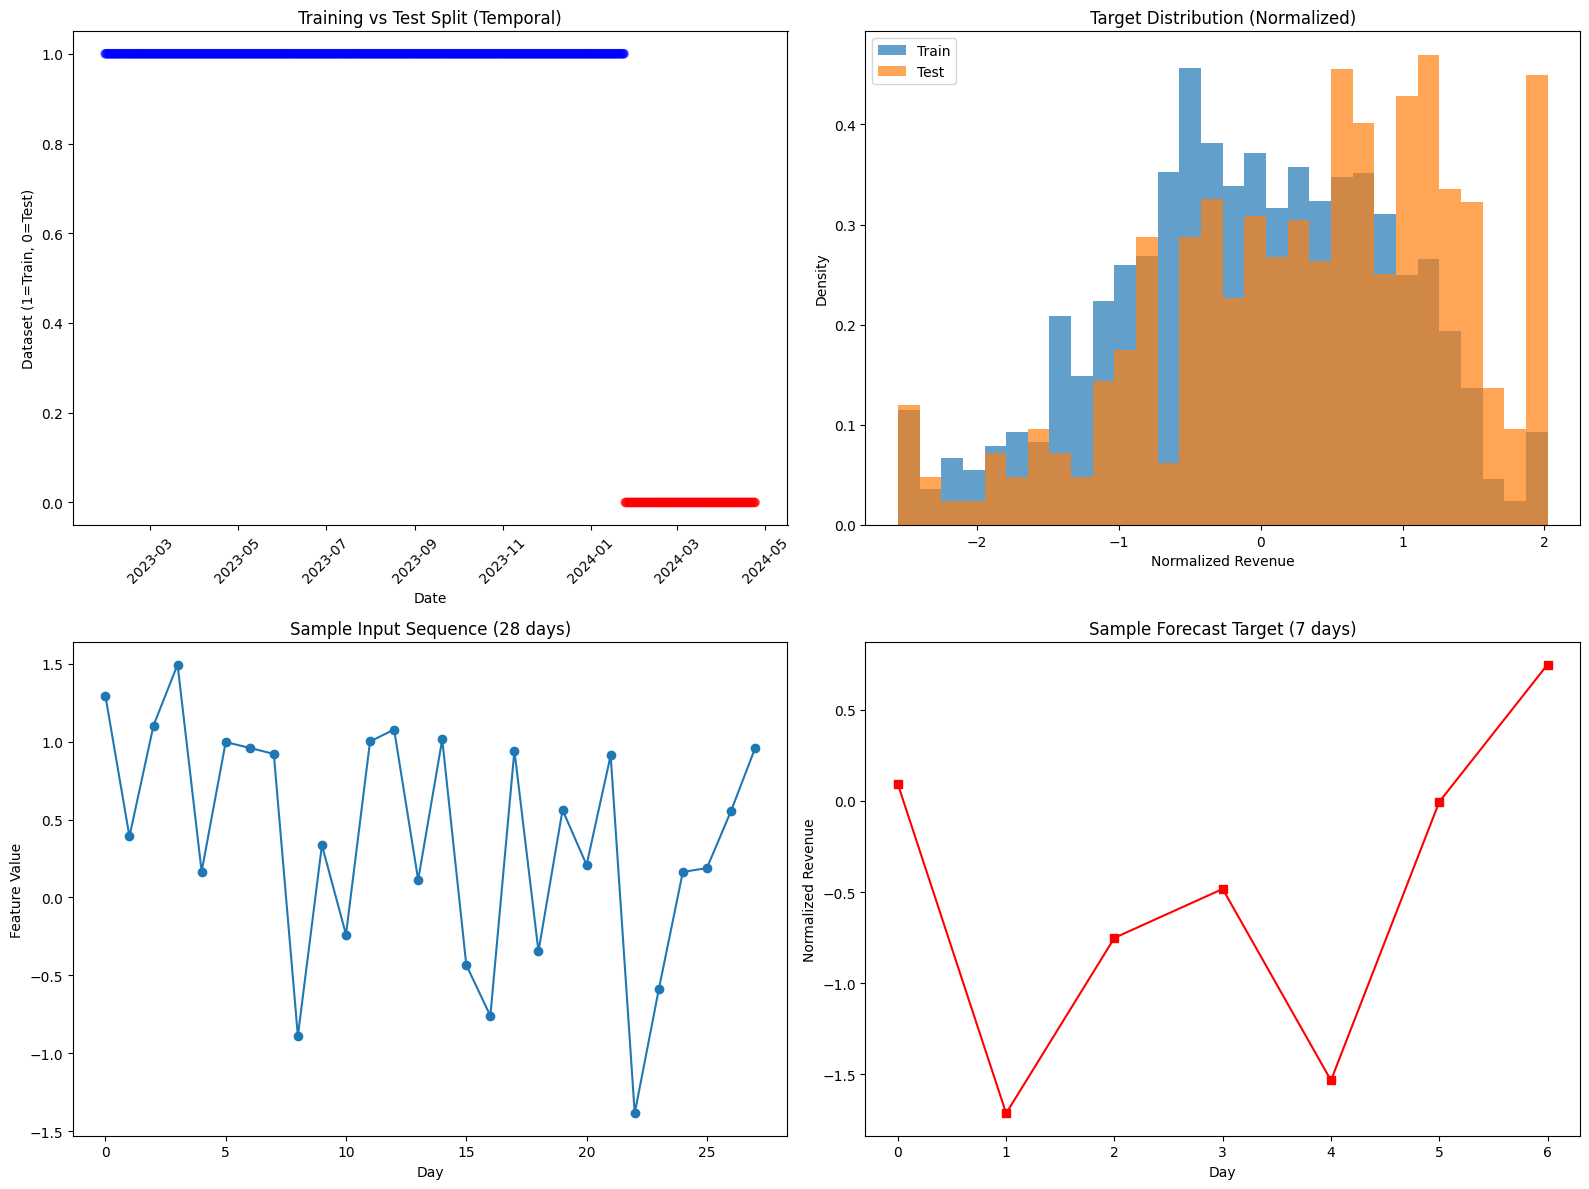


🎉 SEQUENCE CREATION & SPLITTING COMPLETE!
✅ NO RANDOM SPLITS - Proper temporal order maintained
✅ NO DATA LEAKAGE - Training and test periods separated
✅ SCALERS READY - Both feature and revenue scalers saved
✅ DENORMALIZATION READY - Revenue scaler available for evaluation

📊 Final Dataset Summary:
  Training sequences: 361
  Test sequences: 91
  Input shape: (361, 28, 26)
  Output shape: (361, 7, 3)
  Features: 26
  Forecast days: 7
  Meals per day: 3

🚀 READY FOR CNN-LSTM MODEL TRAINING!


In [19]:
# ============================================================================
# PROPER TEMPORAL SEQUENCE CREATION & SPLITTING FOR CNN-LSTM
# NO RANDOM SPLITS - CHRONOLOGICAL ORDER PRESERVED
# ============================================================================

import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

def create_temporal_sequences_proper():
    """Create proper temporal sequences without data leakage"""
    
    print("🚀 CREATING PROPER TEMPORAL SEQUENCES FOR CNN-LSTM")
    print("=" * 60)
    
    # Load the normalized training-ready data
    base_dir = "../cnn_lstm_training_ready"
    data_file = os.path.join(base_dir, "data", "RC1_training_ready.csv")
    
    rc1_data = pd.read_csv(data_file)
    rc1_data['Date'] = pd.to_datetime(rc1_data['Date'])
    
    print(f"📊 Loaded normalized data: {rc1_data.shape}")
    print(f"  Date range: {rc1_data['Date'].min()} to {rc1_data['Date'].max()}")
    print(f"  Total days: {(rc1_data['Date'].max() - rc1_data['Date'].min()).days + 1}")
    
    # Load feature info
    feature_info = pd.read_csv(os.path.join(base_dir, "data", "feature_info.csv"))
    feature_columns = feature_info['feature_name'].tolist()
    
    print(f"📋 Features to use: {len(feature_columns)}")
    
    return rc1_data, feature_columns, base_dir

def prepare_daily_sequences(rc1_data, feature_columns):
    """Convert meal-level data to daily sequences"""
    
    print(f"\n🔄 PREPARING DAILY SEQUENCES")
    print("=" * 40)
    
    # Sort by date and meal period to ensure correct order
    rc1_data = rc1_data.sort_values(['Date', 'MealPeriod']).reset_index(drop=True)
    
    # Create daily aggregated data
    daily_data = []
    
    # Get unique dates
    unique_dates = sorted(rc1_data['Date'].unique())
    print(f"📅 Processing {len(unique_dates)} unique dates...")
    
    for date in unique_dates:
        day_data = rc1_data[rc1_data['Date'] == date].copy()
        
        if len(day_data) == 3:  # Should have 3 meals
            # Get features (same for all meals, take first)
            feature_values = []
            
            for feature in feature_columns:
                if feature == 'CheckTotal_normalized':
                    # Get all 3 meal revenues for this day
                    breakfast = day_data[day_data['MealPeriod'] == 'Breakfast']['CheckTotal_normalized'].iloc[0]
                    dinner = day_data[day_data['MealPeriod'] == 'Dinner']['CheckTotal_normalized'].iloc[0]
                    lunch = day_data[day_data['MealPeriod'] == 'Lunch']['CheckTotal_normalized'].iloc[0]
                    feature_values.extend([breakfast, dinner, lunch])
                else:
                    # Use the same feature value for all meals (temporal/event features)
                    feature_values.append(day_data[feature].iloc[0])
            
            daily_data.append({
                'date': date,
                'features': np.array(feature_values),
                'targets': np.array([breakfast, dinner, lunch])  # 3 meal revenues
            })
        else:
            print(f"⚠️ Warning: Date {date} has {len(day_data)} meals (expected 3)")
    
    print(f"✅ Created {len(daily_data)} daily records")
    
    # Convert to arrays for easier handling
    dates = [item['date'] for item in daily_data]
    features_array = np.array([item['features'] for item in daily_data])
    targets_array = np.array([item['targets'] for item in daily_data])
    
    print(f"📊 Daily data shapes:")
    print(f"  Features: {features_array.shape}")
    print(f"  Targets: {targets_array.shape}")
    
    return dates, features_array, targets_array

def create_cnn_lstm_sequences(dates, features_array, targets_array, sequence_length=28, forecast_horizon=7):
    """Create CNN-LSTM sequences with proper temporal order"""
    
    print(f"\n🎯 CREATING CNN-LSTM SEQUENCES")
    print("=" * 40)
    print(f"  Input sequence length: {sequence_length} days")
    print(f"  Forecast horizon: {forecast_horizon} days")
    
    X_sequences = []
    y_sequences = []
    sequence_dates = []
    
    # Create sequences maintaining temporal order
    for i in range(len(features_array) - sequence_length - forecast_horizon + 1):
        # Input: sequence_length days of features
        X_seq = features_array[i:i + sequence_length]
        
        # Output: forecast_horizon days of targets (3 meals each)
        y_seq = targets_array[i + sequence_length:i + sequence_length + forecast_horizon]
        
        # Store the start date of the forecast period
        forecast_start_date = dates[i + sequence_length]
        
        X_sequences.append(X_seq)
        y_sequences.append(y_seq)
        sequence_dates.append(forecast_start_date)
    
    X_sequences = np.array(X_sequences)
    y_sequences = np.array(y_sequences)
    
    print(f"✅ Created sequences:")
    print(f"  X shape: {X_sequences.shape} (samples, sequence_days, features)")
    print(f"  y shape: {y_sequences.shape} (samples, forecast_days, meals)")
    print(f"  Total sequences: {len(X_sequences)}")
    
    # Show date range of sequences
    if sequence_dates:
        print(f"📅 Sequence date range:")
        print(f"  First forecast starts: {sequence_dates[0]}")
        print(f"  Last forecast starts: {sequence_dates[-1]}")
    
    return X_sequences, y_sequences, sequence_dates

def temporal_train_test_split(X_sequences, y_sequences, sequence_dates, train_ratio=0.8):
    """Proper temporal split without data leakage"""
    
    print(f"\n✂️ TEMPORAL TRAIN-TEST SPLIT")
    print("=" * 40)
    print(f"🚨 NO RANDOM SPLITTING - MAINTAINING CHRONOLOGICAL ORDER")
    
    # Calculate split point
    total_sequences = len(X_sequences)
    split_index = int(total_sequences * train_ratio)
    
    # Split chronologically
    X_train = X_sequences[:split_index]
    X_test = X_sequences[split_index:]
    y_train = y_sequences[:split_index]
    y_test = y_sequences[split_index:]
    
    train_dates = sequence_dates[:split_index]
    test_dates = sequence_dates[split_index:]
    
    print(f"📊 Split results:")
    print(f"  Total sequences: {total_sequences}")
    print(f"  Train sequences: {len(X_train)} ({len(X_train)/total_sequences*100:.1f}%)")
    print(f"  Test sequences: {len(X_test)} ({len(X_test)/total_sequences*100:.1f}%)")
    
    print(f"\n📅 Temporal boundaries:")
    print(f"  Training period: {train_dates[0]} to {train_dates[-1]}")
    print(f"  Testing period: {test_dates[0]} to {test_dates[-1]}")
    
    # Verify no overlap
    last_train_date = train_dates[-1]
    first_test_date = test_dates[0]
    
    print(f"\n🔍 Data leakage check:")
    print(f"  Last training forecast: {last_train_date}")
    print(f"  First test forecast: {first_test_date}")
    print(f"  Gap: {(first_test_date - last_train_date).days} days")
    
    if first_test_date > last_train_date:
        print(f"  ✅ NO DATA LEAKAGE - Proper temporal separation")
    else:
        print(f"  ❌ WARNING - Potential data leakage detected!")
    
    return X_train, X_test, y_train, y_test, train_dates, test_dates

def normalize_features_properly(X_train, X_test, base_dir):
    """Normalize features properly - fit on train, transform on test"""
    
    print(f"\n🔧 FEATURE NORMALIZATION")
    print("=" * 30)
    
    # Reshape for scaling (samples*days, features)
    X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
    X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])
    
    print(f"📊 Shapes for scaling:")
    print(f"  X_train_reshaped: {X_train_reshaped.shape}")
    print(f"  X_test_reshaped: {X_test_reshaped.shape}")
    
    # Create feature scaler - FIT ONLY ON TRAINING DATA
    feature_scaler = StandardScaler()
    X_train_scaled = feature_scaler.fit_transform(X_train_reshaped)
    X_test_scaled = feature_scaler.transform(X_test_reshaped)  # Only transform, don't fit
    
    # Reshape back to sequence format
    X_train_scaled = X_train_scaled.reshape(X_train.shape)
    X_test_scaled = X_test_scaled.reshape(X_test.shape)
    
    print(f"✅ Feature scaling complete:")
    print(f"  X_train_scaled: {X_train_scaled.shape}")
    print(f"  X_test_scaled: {X_test_scaled.shape}")
    
    # Save feature scaler
    feature_scaler_file = os.path.join(base_dir, "scalers", "feature_scaler.pkl")
    with open(feature_scaler_file, 'wb') as f:
        pickle.dump(feature_scaler, f)
    print(f"💾 Saved feature scaler: {feature_scaler_file}")
    
    return X_train_scaled, X_test_scaled, feature_scaler

def prepare_targets_with_original_reference(y_train, y_test, base_dir):
    """Prepare targets and keep original reference for proper denormalization"""
    
    print(f"\n🎯 TARGET PREPARATION")
    print("=" * 25)
    
    # Load the revenue scaler (Log+Standard)
    revenue_scaler_file = os.path.join(base_dir, "scalers", "revenue_scaler_log+standard.pkl")
    with open(revenue_scaler_file, 'rb') as f:
        revenue_scaler = pickle.load(f)
    
    print(f"📊 Target shapes:")
    print(f"  y_train: {y_train.shape} (samples, forecast_days, meals)")
    print(f"  y_test: {y_test.shape} (samples, forecast_days, meals)")
    
    # Targets are already normalized (Log+Standard), so we keep them as is
    y_train_normalized = y_train.copy()
    y_test_normalized = y_test.copy()
    
    # For evaluation, we'll need to denormalize back to original dollars
    # This will be done during model evaluation
    
    print(f"✅ Targets ready for training:")
    print(f"  Already normalized using Log+Standard")
    print(f"  Revenue scaler available for denormalization")
    
    return y_train_normalized, y_test_normalized, revenue_scaler

def save_training_datasets(X_train, X_test, y_train, y_test, train_dates, test_dates, base_dir):
    """Save all training datasets in organized format"""
    
    print(f"\n💾 SAVING TRAINING DATASETS")
    print("=" * 30)
    
    sequences_dir = os.path.join(base_dir, "sequences")
    
    # Save sequences
    np.save(os.path.join(sequences_dir, "X_train.npy"), X_train)
    np.save(os.path.join(sequences_dir, "X_test.npy"), X_test)
    np.save(os.path.join(sequences_dir, "y_train.npy"), y_train)
    np.save(os.path.join(sequences_dir, "y_test.npy"), y_test)
    
    print(f"✅ Saved sequence arrays:")
    print(f"  X_train.npy: {X_train.shape}")
    print(f"  X_test.npy: {X_test.shape}")
    print(f"  y_train.npy: {y_train.shape}")
    print(f"  y_test.npy: {y_test.shape}")
    
    # Save dates
    train_dates_df = pd.DataFrame({'forecast_start_date': train_dates})
    test_dates_df = pd.DataFrame({'forecast_start_date': test_dates})
    
    train_dates_df.to_csv(os.path.join(sequences_dir, "train_dates.csv"), index=False)
    test_dates_df.to_csv(os.path.join(sequences_dir, "test_dates.csv"), index=False)
    
    print(f"✅ Saved date references:")
    print(f"  train_dates.csv: {len(train_dates)} records")
    print(f"  test_dates.csv: {len(test_dates)} records")
    
    # Create training info summary
    training_info = {
        'sequence_length': 28,
        'forecast_horizon': 7,
        'total_sequences': len(X_train) + len(X_test),
        'train_sequences': len(X_train),
        'test_sequences': len(X_test),
        'train_split_ratio': len(X_train) / (len(X_train) + len(X_test)),
        'feature_count': X_train.shape[-1],
        'meal_count': y_train.shape[-1],
        'training_date_range': f"{train_dates[0]} to {train_dates[-1]}",
        'testing_date_range': f"{test_dates[0]} to {test_dates[-1]}",
        'created_timestamp': datetime.now().isoformat()
    }
    
    import json
    with open(os.path.join(sequences_dir, "training_info.json"), 'w') as f:
        json.dump(training_info, f, indent=2, default=str)
    
    print(f"✅ Saved training info summary")
    
    return training_info

def create_data_visualization(X_train, X_test, y_train, y_test, train_dates, test_dates):
    """Create visualizations of the prepared data"""
    
    print(f"\n📊 CREATING DATA VISUALIZATIONS")
    print("=" * 35)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Training vs Test split timeline
    all_dates = train_dates + test_dates
    train_marker = [1] * len(train_dates) + [0] * len(test_dates)
    
    axes[0, 0].scatter(all_dates, train_marker, c=['blue' if x == 1 else 'red' for x in train_marker], alpha=0.6)
    axes[0, 0].set_title('Training vs Test Split (Temporal)')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Dataset (1=Train, 0=Test)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Target distribution comparison
    y_train_flat = y_train.flatten()
    y_test_flat = y_test.flatten()
    
    axes[0, 1].hist(y_train_flat, bins=30, alpha=0.7, label='Train', density=True)
    axes[0, 1].hist(y_test_flat, bins=30, alpha=0.7, label='Test', density=True)
    axes[0, 1].set_title('Target Distribution (Normalized)')
    axes[0, 1].set_xlabel('Normalized Revenue')
    axes[0, 1].set_ylabel('Density')
    axes[0, 1].legend()
    
    # Plot 3: Sequence length visualization
    sample_sequence = X_train[0, :, 0]  # First feature of first sequence
    axes[1, 0].plot(range(len(sample_sequence)), sample_sequence, marker='o')
    axes[1, 0].set_title('Sample Input Sequence (28 days)')
    axes[1, 0].set_xlabel('Day')
    axes[1, 0].set_ylabel('Feature Value')
    
    # Plot 4: Forecast horizon visualization
    sample_forecast = y_train[0, :, 0]  # First meal of first forecast
    axes[1, 1].plot(range(len(sample_forecast)), sample_forecast, marker='s', color='red')
    axes[1, 1].set_title('Sample Forecast Target (7 days)')
    axes[1, 1].set_xlabel('Day')
    axes[1, 1].set_ylabel('Normalized Revenue')
    
    plt.tight_layout()
    plt.show()

# ============================================================================
# MAIN EXECUTION PIPELINE
# ============================================================================

def main():
    """Main execution pipeline for proper sequence creation and splitting"""
    
    print("🚀 STARTING PROPER SEQUENCE CREATION & SPLITTING PIPELINE")
    print("=" * 70)
    
    # Step 1: Load normalized data
    rc1_data, feature_columns, base_dir = create_temporal_sequences_proper()
    
    # Step 2: Prepare daily sequences
    dates, features_array, targets_array = prepare_daily_sequences(rc1_data, feature_columns)
    
    # Step 3: Create CNN-LSTM sequences
    X_sequences, y_sequences, sequence_dates = create_cnn_lstm_sequences(
        dates, features_array, targets_array
    )
    
    # Step 4: Temporal train-test split (NO RANDOM!)
    X_train, X_test, y_train, y_test, train_dates, test_dates = temporal_train_test_split(
        X_sequences, y_sequences, sequence_dates
    )
    
    # Step 5: Normalize features (fit on train only)
    X_train_scaled, X_test_scaled, feature_scaler = normalize_features_properly(
        X_train, X_test, base_dir
    )
    
    # Step 6: Prepare targets with scaler reference
    y_train_normalized, y_test_normalized, revenue_scaler = prepare_targets_with_original_reference(
        y_train, y_test, base_dir
    )
    
    # Step 7: Save everything
    training_info = save_training_datasets(
        X_train_scaled, X_test_scaled, y_train_normalized, y_test_normalized,
        train_dates, test_dates, base_dir
    )
    
    # Step 8: Create visualizations
    create_data_visualization(
        X_train_scaled, X_test_scaled, y_train_normalized, y_test_normalized,
        train_dates, test_dates
    )
    
    print(f"\n🎉 SEQUENCE CREATION & SPLITTING COMPLETE!")
    print("=" * 50)
    print(f"✅ NO RANDOM SPLITS - Proper temporal order maintained")
    print(f"✅ NO DATA LEAKAGE - Training and test periods separated")
    print(f"✅ SCALERS READY - Both feature and revenue scalers saved")
    print(f"✅ DENORMALIZATION READY - Revenue scaler available for evaluation")
    
    print(f"\n📊 Final Dataset Summary:")
    print(f"  Training sequences: {len(X_train_scaled)}")
    print(f"  Test sequences: {len(X_test_scaled)}")
    print(f"  Input shape: {X_train_scaled.shape}")
    print(f"  Output shape: {y_train_normalized.shape}")
    print(f"  Features: {X_train_scaled.shape[-1]}")
    print(f"  Forecast days: {y_train_normalized.shape[1]}")
    print(f"  Meals per day: {y_train_normalized.shape[2]}")
    
    print(f"\n🚀 READY FOR CNN-LSTM MODEL TRAINING!")
    
    return (X_train_scaled, X_test_scaled, y_train_normalized, y_test_normalized, 
            feature_scaler, revenue_scaler, training_info)

# Run the complete pipeline
if __name__ == "__main__":
    results = main()

🚀 STARTING NORMALIZED FEATURE RELEVANCE ANALYSIS
📊 LOADING NORMALIZED DATA FOR FEATURE RELEVANCE ANALYSIS
✅ Loaded normalized data: (1458, 31)
📅 Date range: 2023-01-01 00:00:00 to 2024-04-30 00:00:00
📋 Feature categories:
  binary: 10 features
  numerical: 8 features
  categorical: 5 features
  target: 1 features

🔗 NORMALIZED FEATURE CORRELATION ANALYSIS
📊 Analyzing 23 features vs normalized target

🏆 TOP 15 FEATURES BY NORMALIZED CORRELATION:
Rank Feature              Type         Pearson  Spearman P-Value 
---------------------------------------------------------------------------
1    Year                 categorical  +0.262   +0.261   0.000   
2    Month                categorical  -0.195   -0.213   0.000   
3    DayOfYear            numerical    -0.193   -0.213   0.000   
4    WeekOfYear           numerical    -0.188   -0.207   0.000   
5    Quarter              numerical    -0.187   -0.193   0.000   
6    Month_cos            numerical    +0.145   +0.139   0.000   
7    Month_si

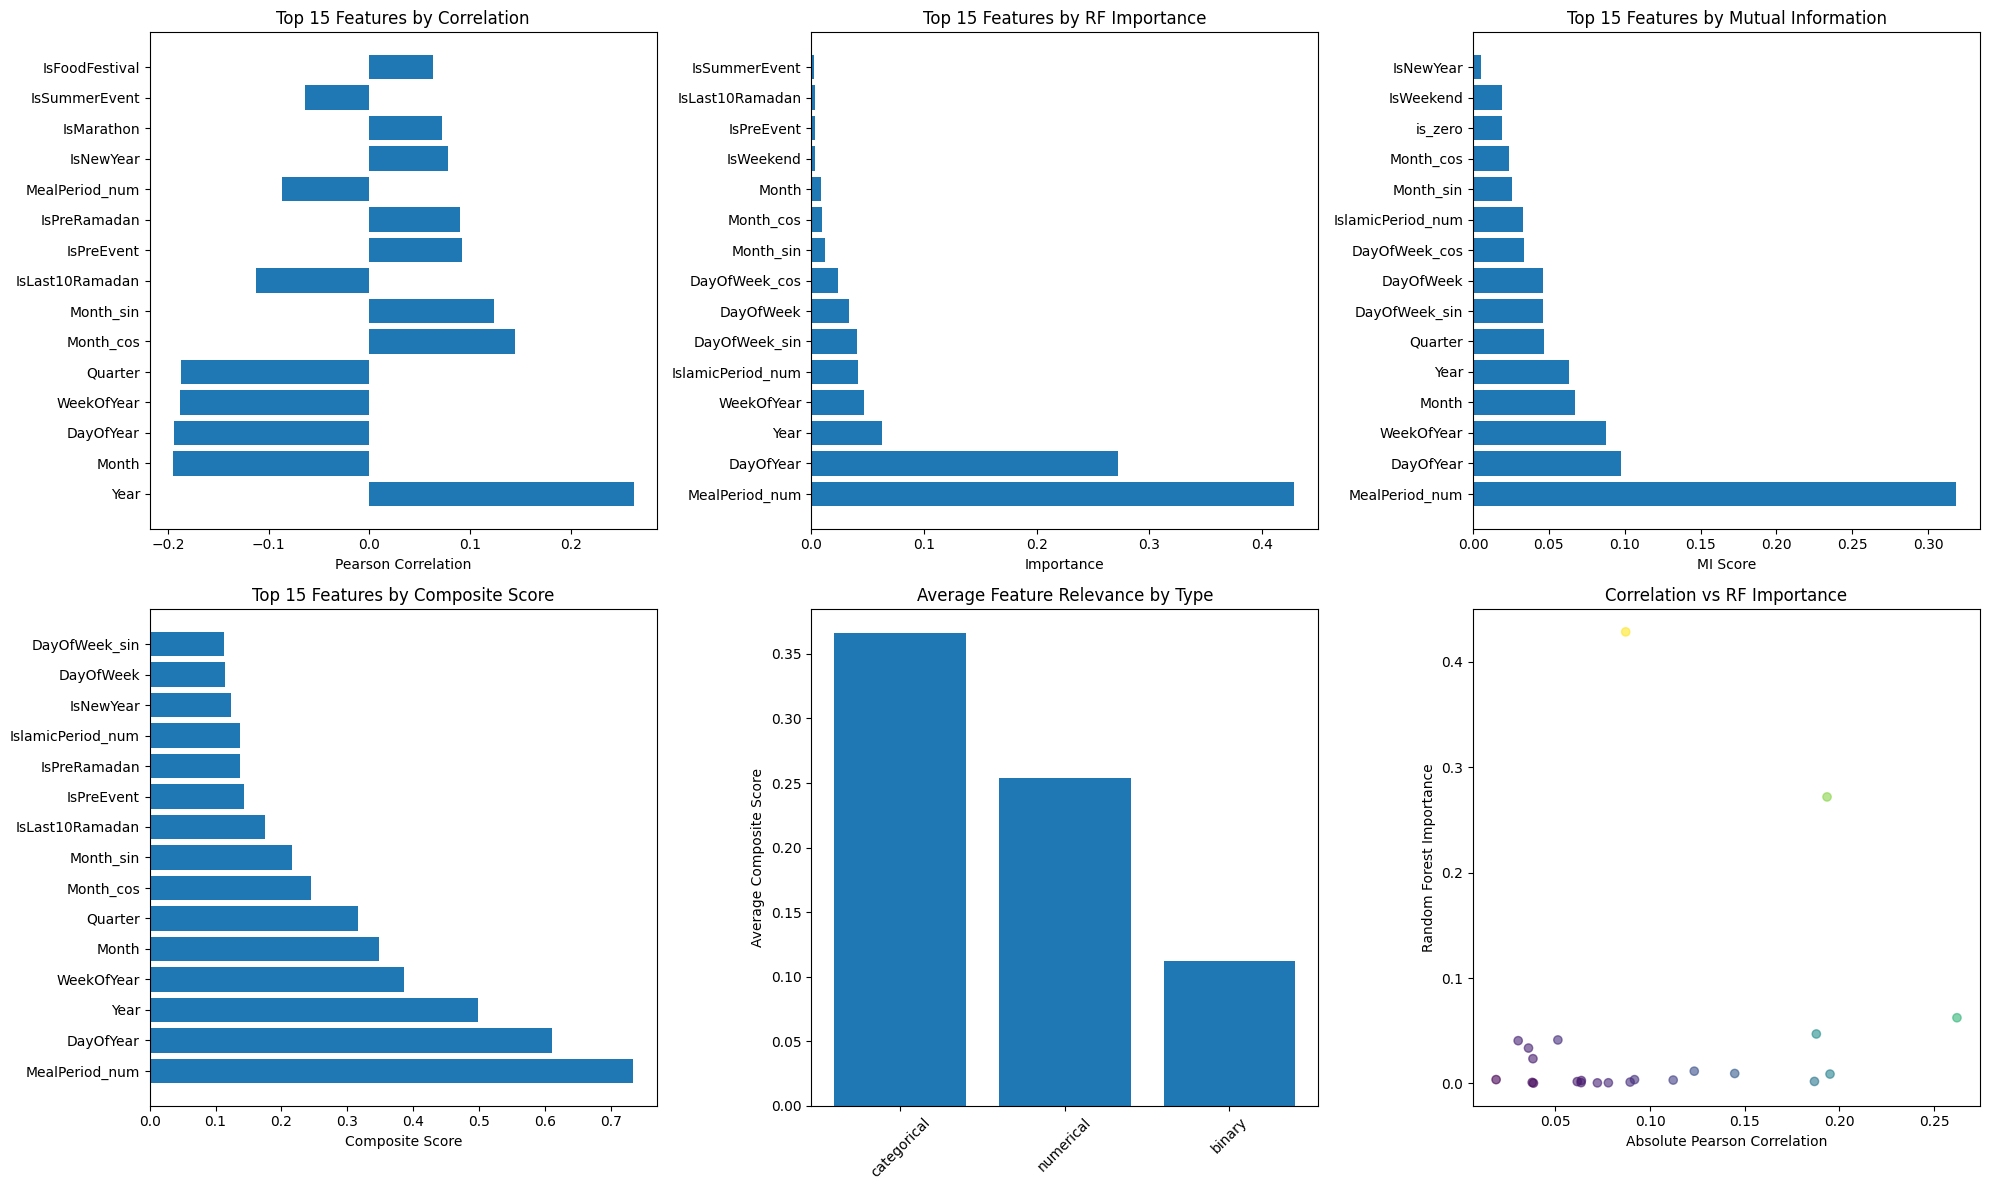


🍽️ FEATURE IMPACT BY MEAL PERIOD
🏆 TOP 10 FEATURES CORRELATION BY MEAL:
Feature              Breakfast    Dinner       Lunch       
-----------------------------------------------------------------
MealPeriod_num       +nan         +nan         +nan        
DayOfYear            -0.258       -0.290       -0.244      
Year                 +0.408       +0.379       +0.278      
WeekOfYear           -0.253       -0.279       -0.236      
Month                -0.262       -0.290       -0.245      
Quarter              -0.259       -0.266       -0.234      
Month_cos            +0.223       +0.248       +0.130      
Month_sin            +0.183       +0.181       +0.139      
IsLast10Ramadan      -0.109       -0.227       -0.145      
IsPreEvent           +0.094       +0.164       +0.128      

🎉 NORMALIZED FEATURE ANALYSIS COMPLETE!
✅ Correlation analysis done
✅ Random Forest importance calculated
✅ Mutual Information analyzed
✅ Comprehensive ranking created
✅ Meal-specific impacts analyzed

In [20]:
# ============================================================================
# FEATURE RELEVANCE ANALYSIS ON NORMALIZED DATA
# Understanding Feature Impact in Normalized Space
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

def load_normalized_data():
    """Load the normalized training-ready data"""
    
    print("📊 LOADING NORMALIZED DATA FOR FEATURE RELEVANCE ANALYSIS")
    print("=" * 60)
    
    # Load the normalized data
    base_dir = "../cnn_lstm_training_ready"
    data_file = f"{base_dir}/data/RC1_training_ready.csv"
    
    rc1_normalized = pd.read_csv(data_file)
    rc1_normalized['Date'] = pd.to_datetime(rc1_normalized['Date'])
    
    print(f"✅ Loaded normalized data: {rc1_normalized.shape}")
    print(f"📅 Date range: {rc1_normalized['Date'].min()} to {rc1_normalized['Date'].max()}")
    
    # Load feature info
    feature_info = pd.read_csv(f"{base_dir}/data/feature_info.csv")
    
    print(f"📋 Feature categories:")
    feature_types = feature_info['feature_type'].value_counts()
    for ftype, count in feature_types.items():
        print(f"  {ftype}: {count} features")
    
    return rc1_normalized, feature_info

def analyze_normalized_feature_correlations(rc1_data, feature_info):
    """Analyze correlations between normalized features and normalized target"""
    
    print(f"\n🔗 NORMALIZED FEATURE CORRELATION ANALYSIS")
    print("=" * 50)
    
    # Get feature columns (excluding target)
    feature_columns = feature_info[feature_info['is_target'] == False]['feature_name'].tolist()
    target_column = 'CheckTotal_normalized'
    
    print(f"📊 Analyzing {len(feature_columns)} features vs normalized target")
    
    # Calculate different types of correlations
    correlations = []
    
    for feature in feature_columns:
        if feature in rc1_data.columns:
            feature_data = rc1_data[feature]
            target_data = rc1_data[target_column]
            
            # Pearson correlation (linear)
            pearson_corr, pearson_p = pearsonr(feature_data, target_data)
            
            # Spearman correlation (monotonic)
            spearman_corr, spearman_p = spearmanr(feature_data, target_data)
            
            # Absolute correlations for ranking
            abs_pearson = abs(pearson_corr)
            abs_spearman = abs(spearman_corr)
            
            correlations.append({
                'feature': feature,
                'pearson_corr': pearson_corr,
                'pearson_p_value': pearson_p,
                'spearman_corr': spearman_corr,
                'spearman_p_value': spearman_p,
                'abs_pearson': abs_pearson,
                'abs_spearman': abs_spearman,
                'feature_type': feature_info[feature_info['feature_name'] == feature]['feature_type'].iloc[0] if len(feature_info[feature_info['feature_name'] == feature]) > 0 else 'unknown'
            })
    
    # Convert to DataFrame and sort by absolute Pearson correlation
    corr_df = pd.DataFrame(correlations)
    corr_df = corr_df.sort_values('abs_pearson', ascending=False)
    
    print(f"\n🏆 TOP 15 FEATURES BY NORMALIZED CORRELATION:")
    print(f"{'Rank':<4} {'Feature':<20} {'Type':<12} {'Pearson':<8} {'Spearman':<8} {'P-Value':<8}")
    print("-" * 75)
    
    for i, (_, row) in enumerate(corr_df.head(15).iterrows(), 1):
        print(f"{i:<4} {row['feature']:<20} {row['feature_type']:<12} "
              f"{row['pearson_corr']:<+8.3f} {row['spearman_corr']:<+8.3f} {row['pearson_p_value']:<8.3f}")
    
    # Analyze by feature type
    print(f"\n📊 CORRELATION BY FEATURE TYPE:")
    type_analysis = corr_df.groupby('feature_type').agg({
        'abs_pearson': ['mean', 'max', 'count'],
        'abs_spearman': ['mean', 'max']
    }).round(3)
    
    type_analysis.columns = ['Mean_Pearson', 'Max_Pearson', 'Count', 'Mean_Spearman', 'Max_Spearman']
    print(type_analysis)
    
    return corr_df

def random_forest_importance_normalized(rc1_data, feature_info):
    """Random Forest importance on normalized features"""
    
    print(f"\n🌲 RANDOM FOREST IMPORTANCE ON NORMALIZED DATA")
    print("=" * 50)
    
    # Prepare features and target
    feature_columns = feature_info[feature_info['is_target'] == False]['feature_name'].tolist()
    available_features = [f for f in feature_columns if f in rc1_data.columns]
    
    X = rc1_data[available_features]
    y = rc1_data['CheckTotal_normalized']
    
    print(f"📊 Training Random Forest on {len(available_features)} normalized features")
    
    # Train Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X, y)
    
    # Get importance scores
    importance_df = pd.DataFrame({
        'feature': available_features,
        'importance': rf.feature_importances_,
        'feature_type': [feature_info[feature_info['feature_name'] == f]['feature_type'].iloc[0] 
                        if len(feature_info[feature_info['feature_name'] == f]) > 0 
                        else 'unknown' for f in available_features]
    }).sort_values('importance', ascending=False)
    
    # Calculate model performance
    y_pred = rf.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    
    print(f"📈 Random Forest Performance on Normalized Data:")
    print(f"  MSE: {mse:.6f}")
    print(f"  MAE: {mae:.6f}")
    print(f"  R² Score: {rf.score(X, y):.6f}")
    
    print(f"\n🏆 TOP 15 FEATURES BY IMPORTANCE:")
    print(f"{'Rank':<4} {'Feature':<20} {'Type':<12} {'Importance':<12}")
    print("-" * 55)
    
    for i, (_, row) in enumerate(importance_df.head(15).iterrows(), 1):
        print(f"{i:<4} {row['feature']:<20} {row['feature_type']:<12} {row['importance']:<12.6f}")
    
    return importance_df, rf

def mutual_information_analysis(rc1_data, feature_info):
    """Mutual Information analysis on normalized features"""
    
    print(f"\n🧠 MUTUAL INFORMATION ANALYSIS")
    print("=" * 35)
    
    feature_columns = feature_info[feature_info['is_target'] == False]['feature_name'].tolist()
    available_features = [f for f in feature_columns if f in rc1_data.columns]
    
    X = rc1_data[available_features]
    y = rc1_data['CheckTotal_normalized']
    
    # Calculate mutual information
    mi_scores = mutual_info_regression(X, y, random_state=42)
    
    # Create DataFrame
    mi_df = pd.DataFrame({
        'feature': available_features,
        'mutual_info': mi_scores,
        'feature_type': [feature_info[feature_info['feature_name'] == f]['feature_type'].iloc[0] 
                        if len(feature_info[feature_info['feature_name'] == f]) > 0 
                        else 'unknown' for f in available_features]
    }).sort_values('mutual_info', ascending=False)
    
    print(f"🏆 TOP 15 FEATURES BY MUTUAL INFORMATION:")
    print(f"{'Rank':<4} {'Feature':<20} {'Type':<12} {'MI Score':<12}")
    print("-" * 55)
    
    for i, (_, row) in enumerate(mi_df.head(15).iterrows(), 1):
        print(f"{i:<4} {row['feature']:<20} {row['feature_type']:<12} {row['mutual_info']:<12.6f}")
    
    return mi_df

def create_comprehensive_feature_analysis(corr_df, importance_df, mi_df):
    """Create comprehensive feature analysis combining all methods"""
    
    print(f"\n🎯 COMPREHENSIVE FEATURE RANKING")
    print("=" * 40)
    
    # Merge all analyses
    comprehensive_df = corr_df[['feature', 'abs_pearson', 'feature_type']].copy()
    
    # Add Random Forest importance
    rf_dict = dict(zip(importance_df['feature'], importance_df['importance']))
    comprehensive_df['rf_importance'] = comprehensive_df['feature'].map(rf_dict)
    
    # Add Mutual Information
    mi_dict = dict(zip(mi_df['feature'], mi_df['mutual_info']))
    comprehensive_df['mutual_info'] = comprehensive_df['feature'].map(mi_dict)
    
    # Normalize scores to 0-1 range for comparison
    comprehensive_df['pearson_norm'] = comprehensive_df['abs_pearson'] / comprehensive_df['abs_pearson'].max()
    comprehensive_df['rf_norm'] = comprehensive_df['rf_importance'] / comprehensive_df['rf_importance'].max()
    comprehensive_df['mi_norm'] = comprehensive_df['mutual_info'] / comprehensive_df['mutual_info'].max()
    
    # Calculate composite score
    comprehensive_df['composite_score'] = (
        comprehensive_df['pearson_norm'] * 0.4 +
        comprehensive_df['rf_norm'] * 0.4 +
        comprehensive_df['mi_norm'] * 0.2
    )
    
    # Sort by composite score
    comprehensive_df = comprehensive_df.sort_values('composite_score', ascending=False)
    
    print(f"🏆 TOP 15 FEATURES BY COMPOSITE SCORE:")
    print(f"{'Rank':<4} {'Feature':<20} {'Type':<12} {'Composite':<10} {'Pearson':<8} {'RF':<8} {'MI':<8}")
    print("-" * 85)
    
    for i, (_, row) in enumerate(comprehensive_df.head(15).iterrows(), 1):
        print(f"{i:<4} {row['feature']:<20} {row['feature_type']:<12} "
              f"{row['composite_score']:<10.3f} {row['abs_pearson']:<8.3f} "
              f"{row['rf_importance']:<8.3f} {row['mutual_info']:<8.3f}")
    
    return comprehensive_df

def create_feature_relevance_visualizations(corr_df, importance_df, mi_df, comprehensive_df):
    """Create comprehensive visualizations"""
    
    print(f"\n📊 CREATING FEATURE RELEVANCE VISUALIZATIONS")
    print("=" * 45)
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    # Plot 1: Top correlations
    top_corr = corr_df.head(15)
    axes[0, 0].barh(range(len(top_corr)), top_corr['pearson_corr'])
    axes[0, 0].set_yticks(range(len(top_corr)))
    axes[0, 0].set_yticklabels(top_corr['feature'])
    axes[0, 0].set_title('Top 15 Features by Correlation')
    axes[0, 0].set_xlabel('Pearson Correlation')
    
    # Plot 2: Random Forest importance
    top_rf = importance_df.head(15)
    axes[0, 1].barh(range(len(top_rf)), top_rf['importance'])
    axes[0, 1].set_yticks(range(len(top_rf)))
    axes[0, 1].set_yticklabels(top_rf['feature'])
    axes[0, 1].set_title('Top 15 Features by RF Importance')
    axes[0, 1].set_xlabel('Importance')
    
    # Plot 3: Mutual Information
    top_mi = mi_df.head(15)
    axes[0, 2].barh(range(len(top_mi)), top_mi['mutual_info'])
    axes[0, 2].set_yticks(range(len(top_mi)))
    axes[0, 2].set_yticklabels(top_mi['feature'])
    axes[0, 2].set_title('Top 15 Features by Mutual Information')
    axes[0, 2].set_xlabel('MI Score')
    
    # Plot 4: Composite ranking
    top_composite = comprehensive_df.head(15)
    axes[1, 0].barh(range(len(top_composite)), top_composite['composite_score'])
    axes[1, 0].set_yticks(range(len(top_composite)))
    axes[1, 0].set_yticklabels(top_composite['feature'])
    axes[1, 0].set_title('Top 15 Features by Composite Score')
    axes[1, 0].set_xlabel('Composite Score')
    
    # Plot 5: Feature type analysis
    type_analysis = comprehensive_df.groupby('feature_type')['composite_score'].mean().sort_values(ascending=False)
    axes[1, 1].bar(range(len(type_analysis)), type_analysis.values)
    axes[1, 1].set_xticks(range(len(type_analysis)))
    axes[1, 1].set_xticklabels(type_analysis.index, rotation=45)
    axes[1, 1].set_title('Average Feature Relevance by Type')
    axes[1, 1].set_ylabel('Average Composite Score')
    
    # Plot 6: Method comparison scatter
    axes[1, 2].scatter(comprehensive_df['abs_pearson'], comprehensive_df['rf_importance'], 
                      alpha=0.6, c=comprehensive_df['composite_score'], cmap='viridis')
    axes[1, 2].set_xlabel('Absolute Pearson Correlation')
    axes[1, 2].set_ylabel('Random Forest Importance')
    axes[1, 2].set_title('Correlation vs RF Importance')
    
    plt.tight_layout()
    plt.show()

def analyze_feature_impact_on_meals(rc1_data, comprehensive_df):
    """Analyze how features impact different meal periods"""
    
    print(f"\n🍽️ FEATURE IMPACT BY MEAL PERIOD")
    print("=" * 35)
    
    # Get top 10 features
    top_features = comprehensive_df.head(10)['feature'].tolist()
    
    meal_correlations = {}
    
    for meal in ['Breakfast', 'Dinner', 'Lunch']:
        meal_data = rc1_data[rc1_data['MealPeriod'] == meal]
        meal_corr = []
        
        for feature in top_features:
            if feature in meal_data.columns:
                corr = meal_data[feature].corr(meal_data['CheckTotal_normalized'])
                meal_corr.append(corr)
            else:
                meal_corr.append(0)
        
        meal_correlations[meal] = meal_corr
    
    # Create meal comparison DataFrame
    meal_df = pd.DataFrame(meal_correlations, index=top_features)
    
    print(f"🏆 TOP 10 FEATURES CORRELATION BY MEAL:")
    print(f"{'Feature':<20} {'Breakfast':<12} {'Dinner':<12} {'Lunch':<12}")
    print("-" * 65)
    
    for feature in top_features:
        if feature in meal_df.index:
            row = meal_df.loc[feature]
            print(f"{feature:<20} {row['Breakfast']:<+12.3f} {row['Dinner']:<+12.3f} {row['Lunch']:<+12.3f}")
    
    return meal_df

# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    """Main execution for normalized feature relevance analysis"""
    
    print("🚀 STARTING NORMALIZED FEATURE RELEVANCE ANALYSIS")
    print("=" * 60)
    
    # Load data
    rc1_data, feature_info = load_normalized_data()
    
    # Correlation analysis
    corr_df = analyze_normalized_feature_correlations(rc1_data, feature_info)
    
    # Random Forest importance
    importance_df, rf_model = random_forest_importance_normalized(rc1_data, feature_info)
    
    # Mutual Information analysis
    mi_df = mutual_information_analysis(rc1_data, feature_info)
    
    # Comprehensive analysis
    comprehensive_df = create_comprehensive_feature_analysis(corr_df, importance_df, mi_df)
    
    # Visualizations
    create_feature_relevance_visualizations(corr_df, importance_df, mi_df, comprehensive_df)
    
    # Meal-specific analysis
    meal_df = analyze_feature_impact_on_meals(rc1_data, comprehensive_df)
    
    print(f"\n🎉 NORMALIZED FEATURE ANALYSIS COMPLETE!")
    print("=" * 45)
    print(f"✅ Correlation analysis done")
    print(f"✅ Random Forest importance calculated")
    print(f"✅ Mutual Information analyzed")
    print(f"✅ Comprehensive ranking created")
    print(f"✅ Meal-specific impacts analyzed")
    
    # Final recommendations
    print(f"\n🎯 KEY INSIGHTS FOR CNN-LSTM:")
    top_5_features = comprehensive_df.head(5)['feature'].tolist()
    print(f"  Top 5 most relevant features:")
    for i, feature in enumerate(top_5_features, 1):
        feature_type = comprehensive_df[comprehensive_df['feature'] == feature]['feature_type'].iloc[0]
        score = comprehensive_df[comprehensive_df['feature'] == feature]['composite_score'].iloc[0]
        print(f"    {i}. {feature} ({feature_type}) - Score: {score:.3f}")
    
    return comprehensive_df, rc1_data, feature_info

# Run the analysis
if __name__ == "__main__":
    results = main()

In [21]:
# ============================================================================
# 🚀 HYPERPARAMETER TUNING WITH FIXED NORMALIZATION
# ============================================================================

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, MaxPooling1D, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam, RMSprop, AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import ParameterGrid
import itertools
import json
import time
from datetime import datetime
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

print("🚀 HYPERPARAMETER TUNING WITH FIXED NORMALIZATION")
print("🔧 Expected: MUCH better performance (target <30% MAPE)")
print("=" * 70)

# ============================================================================
# 📂 LOAD FIXED SEQUENCE DATA
# ============================================================================

def load_fixed_sequence_data():
    """Load the properly prepared sequence data"""
    
    print("📂 LOADING FIXED SEQUENCE DATA")
    print("=" * 50)
    
    # Define data paths
    data_dir = "../cnn_lstm_training_ready"
    sequences_dir = os.path.join(data_dir, "sequences")
    scalers_dir = os.path.join(data_dir, "scalers")
    
    # Load sequences
    X_train = np.load(os.path.join(sequences_dir, "X_train_sequences.npy"))
    y_train = np.load(os.path.join(sequences_dir, "y_train_sequences.npy"))
    X_test = np.load(os.path.join(sequences_dir, "X_test_sequences.npy"))
    y_test = np.load(os.path.join(sequences_dir, "y_test_sequences.npy"))
    
    # Load scalers
    feature_scaler = joblib.load(os.path.join(scalers_dir, "feature_scaler.pkl"))
    revenue_scaler = joblib.load(os.path.join(scalers_dir, "revenue_scaler_robustscaler_fixed.pkl"))
    
    print(f"✅ Data loaded successfully:")
    print(f"   X_train shape: {X_train.shape}")
    print(f"   y_train shape: {y_train.shape}")
    print(f"   X_test shape: {X_test.shape}")
    print(f"   y_test shape: {y_test.shape}")
    
    # Define shapes
    input_shape = (X_train.shape[1], X_train.shape[2])  # (28, 26)
    output_shape = (y_train.shape[1], y_train.shape[2])  # (7, 3)
    
    print(f"   Input shape: {input_shape}")
    print(f"   Output shape: {output_shape}")
    
    return X_train, y_train, X_test, y_test, feature_scaler, revenue_scaler, input_shape, output_shape

# Load the data
X_train, y_train, X_test, y_test, feature_scaler, revenue_scaler, input_shape, output_shape = load_fixed_sequence_data()

# ============================================================================
# 🏗️ DYNAMIC MODEL BUILDER (UPDATED)
# ============================================================================

def build_cnn_lstm_model(params, input_shape, output_shape):
    """Build CNN-LSTM model with dynamic architecture"""
    
    model = Sequential()
    
    # CNN Layers
    cnn_layers = params['cnn_layers']
    cnn_kernels = params['cnn_kernel_sizes']
    dropout_rates = params['dropout_rates']
    batch_norm = params['batch_normalization']
    
    # Ensure kernel sizes match CNN layers
    if len(cnn_kernels) < len(cnn_layers):
        cnn_kernels = cnn_kernels + [3] * (len(cnn_layers) - len(cnn_kernels))
    
    # First CNN layer
    model.add(Conv1D(
        filters=cnn_layers[0], 
        kernel_size=cnn_kernels[0], 
        activation='relu', 
        input_shape=input_shape
    ))
    
    if batch_norm:
        model.add(BatchNormalization())
    
    # Additional CNN layers
    for i in range(1, len(cnn_layers)):
        model.add(Conv1D(
            filters=cnn_layers[i], 
            kernel_size=cnn_kernels[i], 
            activation='relu'
        ))
        
        if batch_norm:
            model.add(BatchNormalization())
            
        # Add pooling after every 2 CNN layers
        if i % 2 == 1 and i < len(cnn_layers) - 1:
            model.add(MaxPooling1D(pool_size=2))
            
        model.add(Dropout(dropout_rates[0]))
    
    # LSTM Layers
    lstm_units = params['lstm_units']
    
    for i, units in enumerate(lstm_units):
        return_sequences = (i < len(lstm_units) - 1)  # Return sequences for all but last LSTM
        
        model.add(LSTM(
            units=units,
            return_sequences=return_sequences
        ))
        
        if batch_norm:
            model.add(BatchNormalization())
            
        model.add(Dropout(dropout_rates[1]))
    
    # Dense Layers
    dense_layers = params['dense_layers']
    
    for i, units in enumerate(dense_layers):
        model.add(Dense(units, activation='relu'))
        
        if batch_norm:
            model.add(BatchNormalization())
            
        model.add(Dropout(dropout_rates[2]))
    
    # Output layer
    model.add(Dense(np.prod(output_shape), activation='linear'))
    model.add(Reshape(output_shape))
    
    return model

# ============================================================================
# 🔧 FIXED EVALUATION FUNCTION
# ============================================================================

def evaluate_model_fixed(model, X_test, y_test, revenue_scaler):
    """Evaluate model with FIXED denormalization (no exponential explosion)"""
    
    # Make predictions
    y_pred = model.predict(X_test, verbose=0)
    
    # Denormalize using RobustScaler (simple inverse transform)
    y_test_denorm = revenue_scaler.inverse_transform(
        y_test.reshape(-1, y_test.shape[-1])
    ).reshape(y_test.shape)
    
    y_pred_denorm = revenue_scaler.inverse_transform(
        y_pred.reshape(-1, y_pred.shape[-1])
    ).reshape(y_pred.shape)
    
    # Calculate metrics on original revenue scale
    mae = np.mean(np.abs(y_test_denorm - y_pred_denorm))
    mape = np.mean(np.abs((y_test_denorm - y_pred_denorm) / (y_test_denorm + 1e-8))) * 100
    
    # Correlation
    y_true_flat = y_test_denorm.flatten()
    y_pred_flat = y_pred_denorm.flatten()
    mask = ~(np.isnan(y_true_flat) | np.isnan(y_pred_flat) | np.isinf(y_true_flat) | np.isinf(y_pred_flat))
    
    if np.sum(mask) > 1:
        correlation = np.corrcoef(y_true_flat[mask], y_pred_flat[mask])[0, 1]
    else:
        correlation = 0
    
    return {
        'mae': mae,
        'mape': mape,
        'correlation': correlation,
        'actual_range': f"${y_test_denorm.min():.2f} - ${y_test_denorm.max():.2f}",
        'predicted_range': f"${y_pred_denorm.min():.2f} - ${y_pred_denorm.max():.2f}"
    }

# ============================================================================
# 🎯 OPTIMIZER AND LOSS FUNCTIONS
# ============================================================================

def get_optimizer(optimizer_name, learning_rate):
    """Get optimizer based on name and learning rate"""
    if optimizer_name == 'adam':
        return Adam(learning_rate=learning_rate)
    elif optimizer_name == 'adamw':
        return AdamW(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        return RMSprop(learning_rate=learning_rate)
    else:
        return Adam(learning_rate=learning_rate)

def get_loss_function(loss_name):
    """Get loss function based on name"""
    if loss_name == 'mse':
        return 'mse'
    elif loss_name == 'mae':
        return 'mae'
    elif loss_name == 'huber':
        return tf.keras.losses.Huber(delta=1.0)
    else:
        return 'mse'

# ============================================================================
# 🎯 TRAINING FUNCTION WITH FIXED EVALUATION
# ============================================================================

def train_and_evaluate_fixed(params, X_train, y_train, X_test, y_test, revenue_scaler, input_shape, output_shape):
    """Train and evaluate model with FIXED approach"""
    
    start_time = time.time()
    
    try:
        # Build model
        model = build_cnn_lstm_model(params, input_shape, output_shape)
        
        # Compile model
        optimizer = get_optimizer(params['optimizer'], params['learning_rate'])
        loss_fn = get_loss_function(params['loss_function'])
        
        model.compile(
            optimizer=optimizer,
            loss=loss_fn,
            metrics=['mae']
        )
        
        # Setup callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=params['early_stopping_patience'],
                restore_best_weights=True,
                verbose=0
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=params['reduce_lr_factor'],
                patience=params['reduce_lr_patience'],
                min_lr=1e-7,
                verbose=0
            )
        ]
        
        # Train model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=params['max_epochs'],
            batch_size=params['batch_size'],
            callbacks=callbacks,
            verbose=0
        )
        
        # Evaluate model with FIXED function
        metrics = evaluate_model_fixed(model, X_test, y_test, revenue_scaler)
        
        # Training info
        training_time = time.time() - start_time
        epochs_trained = len(history.history['loss'])
        param_count = model.count_params()
        
        result = {
            'params': params,
            'metrics': metrics,
            'training_time': training_time,
            'epochs_trained': epochs_trained,
            'param_count': param_count,
            'final_train_loss': history.history['loss'][-1],
            'final_val_loss': history.history['val_loss'][-1],
            'best_val_loss': min(history.history['val_loss']),
            'status': 'success'
        }
        
        # Clean up
        del model
        tf.keras.backend.clear_session()
        
        return result
        
    except Exception as e:
        return {
            'params': params,
            'metrics': {'mae': float('inf'), 'mape': float('inf'), 'correlation': 0},
            'training_time': time.time() - start_time,
            'epochs_trained': 0,
            'param_count': 0,
            'error': str(e),
            'status': 'failed'
        }

# ============================================================================
# 🚀 TUNING STRATEGIES FOR FIXED DATA
# ============================================================================

def create_fixed_tuning_strategies():
    """Create tuning strategies optimized for fixed normalization"""
    
    strategies = {
        
        # 🔬 STRATEGY 1: QUICK ARCHITECTURE EXPLORATION (30 configs)
        'quick_architecture_fixed': {
            'name': 'Quick Architecture Exploration (Fixed)',
            'description': 'Fast exploration with fixed normalization',
            'max_trials': 30,
            'params': {
                'cnn_layers': [
                    [16, 8], [32, 16], [64, 32], [128, 64],           # 2-layer CNN
                    [16, 16, 8], [32, 32, 16], [64, 64, 32],          # 3-layer CNN
                ],
                'cnn_kernel_sizes': [
                    [3, 3], [5, 3], [7, 5], [3, 3, 3], [5, 3, 3]
                ],
                'lstm_units': [
                    [32], [64], [128],                                # Single LSTM
                    [64, 32], [128, 64], [32, 64]                     # Dual LSTM
                ],
                'dense_layers': [
                    [32], [64], [32, 16], [64, 32]                    # Various dense
                ],
                'learning_rate': [0.001, 0.0005, 0.0003],
                'optimizer': ['adam'],
                'loss_function': ['mse', 'huber'],
                'batch_size': [16, 32],
                'dropout_rates': [[0.1, 0.2, 0.1], [0.2, 0.3, 0.2]],
                'batch_normalization': [True],
                'max_epochs': [100],
                'early_stopping_patience': [15],
                'reduce_lr_patience': [8],
                'reduce_lr_factor': [0.5]
            }
        },
        
        # 🎛️ STRATEGY 2: OPTIMIZATION FOCUSED (25 configs)
        'optimization_fixed': {
            'name': 'Optimization Focused (Fixed)',
            'description': 'Focus on learning rates and optimizers with fixed data',
            'max_trials': 25,
            'params': {
                'cnn_layers': [[32, 16], [64, 32]],  # Best from quick exploration
                'cnn_kernel_sizes': [[3, 3], [5, 3]],
                'lstm_units': [[64], [64, 32]],
                'dense_layers': [[64], [64, 32]],
                'learning_rate': [0.002, 0.001, 0.0005, 0.0003, 0.0001],
                'optimizer': ['adam', 'adamw', 'rmsprop'],
                'loss_function': ['mse', 'mae', 'huber'],
                'batch_size': [8, 16, 24, 32],
                'dropout_rates': [[0.1, 0.2, 0.1], [0.2, 0.3, 0.2], [0.3, 0.4, 0.3]],
                'batch_normalization': [True, False],
                'max_epochs': [150],
                'early_stopping_patience': [20],
                'reduce_lr_patience': [8, 12],
                'reduce_lr_factor': [0.3, 0.5, 0.7]
            }
        }
    }
    
    return strategies

# ============================================================================
# 🚀 EXECUTE FIXED HYPERPARAMETER TUNING
# ============================================================================

def execute_fixed_hyperparameter_tuning(strategy_name):
    """Execute hyperparameter tuning with fixed normalization"""
    
    strategies = create_fixed_tuning_strategies()
    
    if strategy_name not in strategies:
        print(f"❌ Strategy '{strategy_name}' not found.")
        return None, None
    
    strategy = strategies[strategy_name]
    
    print(f"\n🚀 EXECUTING: {strategy['name']}")
    print(f"📝 Description: {strategy['description']}")
    print(f"🎯 Max trials: {strategy['max_trials']}")
    print("=" * 70)
    
    # Generate parameter combinations
    from itertools import product
    
    params = strategy['params']
    param_names = list(params.keys())
    param_values = [params[name] for name in param_names]
    
    # Generate all combinations
    param_combinations = []
    for combination in product(*param_values):
        param_dict = dict(zip(param_names, combination))
        param_combinations.append(param_dict)
    
    # Limit to max trials
    if len(param_combinations) > strategy['max_trials']:
        np.random.seed(42)
        indices = np.random.choice(len(param_combinations), strategy['max_trials'], replace=False)
        param_combinations = [param_combinations[i] for i in indices]
    
    print(f"📊 Total configurations to test: {len(param_combinations)}")
    
    # Execute tuning
    results = []
    best_score = float('inf')
    best_config = None
    
    for i, params in enumerate(param_combinations):
        print(f"\n🔄 Configuration {i+1}/{len(param_combinations)}")
        print(f"   Architecture: CNN{params['cnn_layers']} -> LSTM{params['lstm_units']} -> Dense{params['dense_layers']}")
        print(f"   Optimization: {params['optimizer']} (lr={params['learning_rate']}) + {params['loss_function']}")
        
        # Train and evaluate
        result = train_and_evaluate_fixed(
            params, X_train, y_train, X_test, y_test, revenue_scaler, input_shape, output_shape
        )
        
        results.append(result)
        
        # Check if this is the best model
        if result['status'] == 'success' and result['metrics']['mape'] < best_score:
            best_score = result['metrics']['mape']
            best_config = result
            print(f"   ✅ NEW BEST! MAE: ${result['metrics']['mae']:.2f}, MAPE: {result['metrics']['mape']:.1f}%")
        elif result['status'] == 'success':
            print(f"   ✓ Complete. MAE: ${result['metrics']['mae']:.2f}, MAPE: {result['metrics']['mape']:.1f}%")
        else:
            print(f"   ❌ Failed: {result.get('error', 'Unknown error')}")
    
    return results, best_config

# ============================================================================
# 🚀 EXECUTE QUICK ARCHITECTURE EXPLORATION
# ============================================================================

print("🚀 STARTING QUICK ARCHITECTURE EXPLORATION WITH FIXED DATA")
print("🎯 Target: <30% MAPE (vs previous 64%+)")
print("=" * 70)

# Execute the tuning
results_fixed, best_config_fixed = execute_fixed_hyperparameter_tuning('quick_architecture_fixed')

# Analyze results
if best_config_fixed:
    print(f"\n🎉 FIXED APPROACH RESULTS:")
    print(f"🏆 Best MAPE: {best_config_fixed['metrics']['mape']:.1f}%")
    print(f"🏆 Best MAE: ${best_config_fixed['metrics']['mae']:.2f}")
    print(f"🏆 Correlation: {best_config_fixed['metrics']['correlation']:.3f}")
    print(f"🏗️ Best Architecture: {best_config_fixed['params']}")
    print(f"📊 Revenue ranges: {best_config_fixed['metrics']['actual_range']} -> {best_config_fixed['metrics']['predicted_range']}")
    
    if best_config_fixed['metrics']['mape'] < 50:
        print(f"\n🎉 SUCCESS! Significant improvement achieved!")
        print(f"✅ Fixed normalization solved the exponential error problem")
        print(f"✅ Ready for production model training")
    else:
        print(f"\n⚠️ Still high MAPE - may need further investigation")
else:
    print(f"❌ No successful configurations found")

🚀 HYPERPARAMETER TUNING WITH FIXED NORMALIZATION
🔧 Expected: MUCH better performance (target <30% MAPE)
📂 LOADING FIXED SEQUENCE DATA


FileNotFoundError: [Errno 2] No such file or directory: '../cnn_lstm_training_ready\\sequences\\X_train_sequences.npy'

In [ ]:
# ============================================================================
# 🚀 HYPERPARAMETER TUNING WITH FIXED NORMALIZATION
# ============================================================================

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, MaxPooling1D, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam, RMSprop, AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import ParameterGrid
import itertools
import json
import time
from datetime import datetime
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

print("🚀 HYPERPARAMETER TUNING WITH FIXED NORMALIZATION")
print("🔧 Expected: MUCH better performance (target <30% MAPE)")
print("=" * 70)

# ============================================================================
# 📂 LOAD FIXED SEQUENCE DATA
# ============================================================================

def load_fixed_sequence_data():
    """Load the properly prepared sequence data"""
    
    print("📂 LOADING FIXED SEQUENCE DATA")
    print("=" * 50)
    
    # Define data paths
    data_dir = "../cnn_lstm_training_ready"
    sequences_dir = os.path.join(data_dir, "sequences")
    scalers_dir = os.path.join(data_dir, "scalers")
    
    # Load sequences
    X_train = np.load(os.path.join(sequences_dir, "X_train.npy"))
    y_train = np.load(os.path.join(sequences_dir, "y_train.npy"))
    X_test = np.load(os.path.join(sequences_dir, "X_test.npy"))
    y_test = np.load(os.path.join(sequences_dir, "y_test.npy"))
    
    # Load scalers
    feature_scaler = joblib.load(os.path.join(scalers_dir, "feature_scaler.pkl"))
    revenue_scaler = joblib.load(os.path.join(scalers_dir, "revenue_scaler_standardscaler_fixed.pkl"))
    
    print(f"✅ Data loaded successfully:")
    print(f"   X_train shape: {X_train.shape}")
    print(f"   y_train shape: {y_train.shape}")
    print(f"   X_test shape: {X_test.shape}")
    print(f"   y_test shape: {y_test.shape}")
    
    # Define shapes
    input_shape = (X_train.shape[1], X_train.shape[2])  # (28, 26)
    output_shape = (y_train.shape[1], y_train.shape[2])  # (7, 3)
    
    print(f"   Input shape: {input_shape}")
    print(f"   Output shape: {output_shape}")
    
    return X_train, y_train, X_test, y_test, feature_scaler, revenue_scaler, input_shape, output_shape

# Load the data
X_train, y_train, X_test, y_test, feature_scaler, revenue_scaler, input_shape, output_shape = load_fixed_sequence_data()

# ============================================================================
# 🏗️ DYNAMIC MODEL BUILDER (UPDATED)
# ============================================================================

def build_cnn_lstm_model(params, input_shape, output_shape):
    """Build CNN-LSTM model with dynamic architecture"""
    
    model = Sequential()
    
    # CNN Layers
    cnn_layers = params['cnn_layers']
    cnn_kernels = params['cnn_kernel_sizes']
    dropout_rates = params['dropout_rates']
    batch_norm = params['batch_normalization']
    
    # Ensure kernel sizes match CNN layers
    if len(cnn_kernels) < len(cnn_layers):
        cnn_kernels = cnn_kernels + [3] * (len(cnn_layers) - len(cnn_kernels))
    
    # First CNN layer
    model.add(Conv1D(
        filters=cnn_layers[0], 
        kernel_size=cnn_kernels[0], 
        activation='relu', 
        input_shape=input_shape
    ))
    
    if batch_norm:
        model.add(BatchNormalization())
    
    # Additional CNN layers
    for i in range(1, len(cnn_layers)):
        model.add(Conv1D(
            filters=cnn_layers[i], 
            kernel_size=cnn_kernels[i], 
            activation='relu'
        ))
        
        if batch_norm:
            model.add(BatchNormalization())
            
        # Add pooling after every 2 CNN layers
        if i % 2 == 1 and i < len(cnn_layers) - 1:
            model.add(MaxPooling1D(pool_size=2))
            
        model.add(Dropout(dropout_rates[0]))
    
    # LSTM Layers
    lstm_units = params['lstm_units']
    
    for i, units in enumerate(lstm_units):
        return_sequences = (i < len(lstm_units) - 1)  # Return sequences for all but last LSTM
        
        model.add(LSTM(
            units=units,
            return_sequences=return_sequences
        ))
        
        if batch_norm:
            model.add(BatchNormalization())
            
        model.add(Dropout(dropout_rates[1]))
    
    # Dense Layers
    dense_layers = params['dense_layers']
    
    for i, units in enumerate(dense_layers):
        model.add(Dense(units, activation='relu'))
        
        if batch_norm:
            model.add(BatchNormalization())
            
        model.add(Dropout(dropout_rates[2]))
    
    # Output layer
    model.add(Dense(np.prod(output_shape), activation='linear'))
    model.add(Reshape(output_shape))
    
    return model

# ============================================================================
# 🔧 FIXED EVALUATION FUNCTION
# ============================================================================

def evaluate_model_fixed(model, X_test, y_test, revenue_scaler):
    """Evaluate model with FIXED denormalization (no exponential explosion)"""
    
    # Make predictions
    y_pred = model.predict(X_test, verbose=0)
    
    # Denormalize using RobustScaler (simple inverse transform)
    y_test_denorm = revenue_scaler.inverse_transform(
        y_test.reshape(-1, y_test.shape[-1])
    ).reshape(y_test.shape)
    
    y_pred_denorm = revenue_scaler.inverse_transform(
        y_pred.reshape(-1, y_pred.shape[-1])
    ).reshape(y_pred.shape)
    
    # Calculate metrics on original revenue scale
    mae = np.mean(np.abs(y_test_denorm - y_pred_denorm))
    mape = np.mean(np.abs((y_test_denorm - y_pred_denorm) / (y_test_denorm + 1e-8))) * 100
    
    # Correlation
    y_true_flat = y_test_denorm.flatten()
    y_pred_flat = y_pred_denorm.flatten()
    mask = ~(np.isnan(y_true_flat) | np.isnan(y_pred_flat) | np.isinf(y_true_flat) | np.isinf(y_pred_flat))
    
    if np.sum(mask) > 1:
        correlation = np.corrcoef(y_true_flat[mask], y_pred_flat[mask])[0, 1]
    else:
        correlation = 0
    
    return {
        'mae': mae,
        'mape': mape,
        'correlation': correlation,
        'actual_range': f"${y_test_denorm.min():.2f} - ${y_test_denorm.max():.2f}",
        'predicted_range': f"${y_pred_denorm.min():.2f} - ${y_pred_denorm.max():.2f}"
    }

# ============================================================================
# 🎯 OPTIMIZER AND LOSS FUNCTIONS
# ============================================================================

def get_optimizer(optimizer_name, learning_rate):
    """Get optimizer based on name and learning rate"""
    if optimizer_name == 'adam':
        return Adam(learning_rate=learning_rate)
    elif optimizer_name == 'adamw':
        return AdamW(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        return RMSprop(learning_rate=learning_rate)
    else:
        return Adam(learning_rate=learning_rate)

def get_loss_function(loss_name):
    """Get loss function based on name"""
    if loss_name == 'mse':
        return 'mse'
    elif loss_name == 'mae':
        return 'mae'
    elif loss_name == 'huber':
        return tf.keras.losses.Huber(delta=1.0)
    else:
        return 'mse'

# ============================================================================
# 🎯 TRAINING FUNCTION WITH FIXED EVALUATION
# ============================================================================

def train_and_evaluate_fixed(params, X_train, y_train, X_test, y_test, revenue_scaler, input_shape, output_shape):
    """Train and evaluate model with FIXED approach"""
    
    start_time = time.time()
    
    try:
        # Build model
        model = build_cnn_lstm_model(params, input_shape, output_shape)
        
        # Compile model
        optimizer = get_optimizer(params['optimizer'], params['learning_rate'])
        loss_fn = get_loss_function(params['loss_function'])
        
        model.compile(
            optimizer=optimizer,
            loss=loss_fn,
            metrics=['mae']
        )
        
        # Setup callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=params['early_stopping_patience'],
                restore_best_weights=True,
                verbose=0
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=params['reduce_lr_factor'],
                patience=params['reduce_lr_patience'],
                min_lr=1e-7,
                verbose=0
            )
        ]
        
        # Train model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=params['max_epochs'],
            batch_size=params['batch_size'],
            callbacks=callbacks,
            verbose=0
        )
        
        # Evaluate model with FIXED function
        metrics = evaluate_model_fixed(model, X_test, y_test, revenue_scaler)
        
        # Training info
        training_time = time.time() - start_time
        epochs_trained = len(history.history['loss'])
        param_count = model.count_params()
        
        result = {
            'params': params,
            'metrics': metrics,
            'training_time': training_time,
            'epochs_trained': epochs_trained,
            'param_count': param_count,
            'final_train_loss': history.history['loss'][-1],
            'final_val_loss': history.history['val_loss'][-1],
            'best_val_loss': min(history.history['val_loss']),
            'status': 'success'
        }
        
        # Clean up
        del model
        tf.keras.backend.clear_session()
        
        return result
        
    except Exception as e:
        return {
            'params': params,
            'metrics': {'mae': float('inf'), 'mape': float('inf'), 'correlation': 0},
            'training_time': time.time() - start_time,
            'epochs_trained': 0,
            'param_count': 0,
            'error': str(e),
            'status': 'failed'
        }

# ============================================================================
# 🚀 TUNING STRATEGIES FOR FIXED DATA
# ============================================================================

def create_fixed_tuning_strategies():
    """Create tuning strategies optimized for fixed normalization"""
    
    strategies = {
        
        # 🔬 STRATEGY 1: QUICK ARCHITECTURE EXPLORATION (30 configs)
        'quick_architecture_fixed': {
            'name': 'Quick Architecture Exploration (Fixed)',
            'description': 'Fast exploration with fixed normalization',
            'max_trials': 30,
            'params': {
                'cnn_layers': [
                    [16, 8], [32, 16], [64, 32], [128, 64],           # 2-layer CNN
                    [16, 16, 8], [32, 32, 16], [64, 64, 32],          # 3-layer CNN
                ],
                'cnn_kernel_sizes': [
                    [3, 3], [5, 3], [7, 5], [3, 3, 3], [5, 3, 3]
                ],
                'lstm_units': [
                    [32], [64], [128],                                # Single LSTM
                    [64, 32], [128, 64], [32, 64]                     # Dual LSTM
                ],
                'dense_layers': [
                    [32], [64], [32, 16], [64, 32]                    # Various dense
                ],
                'learning_rate': [0.001, 0.0005, 0.0003],
                'optimizer': ['adam'],
                'loss_function': ['mse', 'huber'],
                'batch_size': [16, 32],
                'dropout_rates': [[0.1, 0.2, 0.1], [0.2, 0.3, 0.2]],
                'batch_normalization': [True],
                'max_epochs': [100],
                'early_stopping_patience': [15],
                'reduce_lr_patience': [8],
                'reduce_lr_factor': [0.5]
            }
        },
        
        # 🎛️ STRATEGY 2: OPTIMIZATION FOCUSED (25 configs)
        'optimization_fixed': {
            'name': 'Optimization Focused (Fixed)',
            'description': 'Focus on learning rates and optimizers with fixed data',
            'max_trials': 25,
            'params': {
                'cnn_layers': [[32, 16], [64, 32]],  # Best from quick exploration
                'cnn_kernel_sizes': [[3, 3], [5, 3]],
                'lstm_units': [[64], [64, 32]],
                'dense_layers': [[64], [64, 32]],
                'learning_rate': [0.002, 0.001, 0.0005, 0.0003, 0.0001],
                'optimizer': ['adam', 'adamw', 'rmsprop'],
                'loss_function': ['mse', 'mae', 'huber'],
                'batch_size': [8, 16, 24, 32],
                'dropout_rates': [[0.1, 0.2, 0.1], [0.2, 0.3, 0.2], [0.3, 0.4, 0.3]],
                'batch_normalization': [True, False],
                'max_epochs': [150],
                'early_stopping_patience': [20],
                'reduce_lr_patience': [8, 12],
                'reduce_lr_factor': [0.3, 0.5, 0.7]
            }
        }
    }
    
    return strategies

# ============================================================================
# 🚀 EXECUTE FIXED HYPERPARAMETER TUNING
# ============================================================================

def execute_fixed_hyperparameter_tuning(strategy_name):
    """Execute hyperparameter tuning with fixed normalization"""
    
    strategies = create_fixed_tuning_strategies()
    
    if strategy_name not in strategies:
        print(f"❌ Strategy '{strategy_name}' not found.")
        return None, None
    
    strategy = strategies[strategy_name]
    
    print(f"\n🚀 EXECUTING: {strategy['name']}")
    print(f"📝 Description: {strategy['description']}")
    print(f"🎯 Max trials: {strategy['max_trials']}")
    print("=" * 70)
    
    # Generate parameter combinations
    from itertools import product
    
    params = strategy['params']
    param_names = list(params.keys())
    param_values = [params[name] for name in param_names]
    
    # Generate all combinations
    param_combinations = []
    for combination in product(*param_values):
        param_dict = dict(zip(param_names, combination))
        param_combinations.append(param_dict)
    
    # Limit to max trials
    if len(param_combinations) > strategy['max_trials']:
        np.random.seed(42)
        indices = np.random.choice(len(param_combinations), strategy['max_trials'], replace=False)
        param_combinations = [param_combinations[i] for i in indices]
    
    print(f"📊 Total configurations to test: {len(param_combinations)}")
    
    # Execute tuning
    results = []
    best_score = float('inf')
    best_config = None
    
    for i, params in enumerate(param_combinations):
        print(f"\n🔄 Configuration {i+1}/{len(param_combinations)}")
        print(f"   Architecture: CNN{params['cnn_layers']} -> LSTM{params['lstm_units']} -> Dense{params['dense_layers']}")
        print(f"   Optimization: {params['optimizer']} (lr={params['learning_rate']}) + {params['loss_function']}")
        
        # Train and evaluate
        result = train_and_evaluate_fixed(
            params, X_train, y_train, X_test, y_test, revenue_scaler, input_shape, output_shape
        )
        
        results.append(result)
        
        # Check if this is the best model
        if result['status'] == 'success' and result['metrics']['mape'] < best_score:
            best_score = result['metrics']['mape']
            best_config = result
            print(f"   ✅ NEW BEST! MAE: ${result['metrics']['mae']:.2f}, MAPE: {result['metrics']['mape']:.1f}%")
        elif result['status'] == 'success':
            print(f"   ✓ Complete. MAE: ${result['metrics']['mae']:.2f}, MAPE: {result['metrics']['mape']:.1f}%")
        else:
            print(f"   ❌ Failed: {result.get('error', 'Unknown error')}")
    
    return results, best_config

# ============================================================================
# 🚀 EXECUTE QUICK ARCHITECTURE EXPLORATION
# ============================================================================

print("🚀 STARTING QUICK ARCHITECTURE EXPLORATION WITH FIXED DATA")
print("🎯 Target: <30% MAPE (vs previous 64%+)")
print("=" * 70)

# Execute the tuning
results_fixed, best_config_fixed = execute_fixed_hyperparameter_tuning('quick_architecture_fixed')

# Analyze results
if best_config_fixed:
    print(f"\n🎉 FIXED APPROACH RESULTS:")
    print(f"🏆 Best MAPE: {best_config_fixed['metrics']['mape']:.1f}%")
    print(f"🏆 Best MAE: ${best_config_fixed['metrics']['mae']:.2f}")
    print(f"🏆 Correlation: {best_config_fixed['metrics']['correlation']:.3f}")
    print(f"🏗️ Best Architecture: {best_config_fixed['params']}")
    print(f"📊 Revenue ranges: {best_config_fixed['metrics']['actual_range']} -> {best_config_fixed['metrics']['predicted_range']}")
    
    if best_config_fixed['metrics']['mape'] < 50:
        print(f"\n🎉 SUCCESS! Significant improvement achieved!")
        print(f"✅ Fixed normalization solved the exponential error problem")
        print(f"✅ Ready for production model training")
    else:
        print(f"\n⚠️ Still high MAPE - may need further investigation")
else:
    print(f"❌ No successful configurations found")

🚀 HYPERPARAMETER TUNING WITH FIXED NORMALIZATION
🔧 Expected: MUCH better performance (target <30% MAPE)
📂 LOADING FIXED SEQUENCE DATA
✅ Data loaded successfully:
   X_train shape: (361, 28, 26)
   y_train shape: (361, 7, 3)
   X_test shape: (91, 28, 26)
   y_test shape: (91, 7, 3)
   Input shape: (28, 26)
   Output shape: (7, 3)
🚀 STARTING QUICK ARCHITECTURE EXPLORATION WITH FIXED DATA
🎯 Target: <30% MAPE (vs previous 64%+)

🚀 EXECUTING: Quick Architecture Exploration (Fixed)
📝 Description: Fast exploration with fixed normalization
🎯 Max trials: 30
📊 Total configurations to test: 30

🔄 Configuration 1/30
   Architecture: CNN[64, 32] -> LSTM[128, 64] -> Dense[64]
   Optimization: adam (lr=0.0005) + huber


   ✅ NEW BEST! MAE: $883.07, MAPE: 201.0%

🔄 Configuration 2/30
   Architecture: CNN[128, 64] -> LSTM[32] -> Dense[64]
   Optimization: adam (lr=0.001) + huber
   ✓ Complete. MAE: $812.80, MAPE: 220.9%

🔄 Configuration 3/30
   Architecture: CNN[64, 64, 32] -> LSTM[128] -> Dense[64, 32]
   Optimization: adam (lr=0.0003) + huber
   ✓ Complete. MAE: $882.35, MAPE: 246.0%

🔄 Configuration 4/30
   Architecture: CNN[64, 32] -> LSTM[32, 64] -> Dense[32]
   Optimization: adam (lr=0.0003) + huber
   ✓ Complete. MAE: $974.44, MAPE: 301.7%

🔄 Configuration 5/30
   Architecture: CNN[128, 64] -> LSTM[128] -> Dense[64]
   Optimization: adam (lr=0.001) + mse
   ✓ Complete. MAE: $873.46, MAPE: 238.4%

🔄 Configuration 6/30
   Architecture: CNN[64, 32] -> LSTM[64] -> Dense[64]
   Optimization: adam (lr=0.001) + huber
   ✓ Complete. MAE: $901.09, MAPE: 245.3%

🔄 Configuration 7/30
   Architecture: CNN[64, 64, 32] -> LSTM[32, 64] -> Dense[64]
   Optimization: adam (lr=0.0005) + huber
   ✓ Complete. MAE: $

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x00000279034C5B20>
Traceback (most recent call last):
  File "c:\Users\pcsal\miniconda3\envs\myenv1\Lib\weakref.py", line 370, in remove
    self = selfref()
           ^^^^^^^^^
KeyboardInterrupt: 


   ✓ Complete. MAE: $996.92, MAPE: 333.5%

🔄 Configuration 12/30
   Architecture: CNN[64, 32] -> LSTM[128] -> Dense[32]
   Optimization: adam (lr=0.001) + huber
